In [31]:
# import some useful packages
library("tidyr")
library("dplyr")
library("ggplot2")
library("zoo")
library("repr")
library("tibble")
library("tidyverse")
library("gridExtra")
library("ggthemes")


# Lakes of Scotland

In [32]:
lake_names  <- c("Loch Ness", "Loch Lomond", "Lock Morar", "Loch Tay", "Loch Awe", "Loch Maree",
                 "Loch Ericht", "Loch Lochy", "Loch Rannoch", "Loch Shiel", "Loch Katrine",
                 "Loch Arkaig", "Loch Shin")
param_names <- c("Loch", "Volume_Km3", "Volume_mi3", "Area_Km2", "Area_mi2", 
                 "Length_Km", "Length_mi", "Max_depth_m",
                 "Max_depth_ft", "Mean_depth_m", "Mean_depth_ft")

In [33]:
dir  <- "DATA"
fname <- "DEPTH_LAKES.csv"

# Create a directory with data named DATA
system(paste("mkdir", dir, sep=" "))

# Read data from csv and change header
scottish.lakes <- read.table(paste(dir, fname, sep="/"), sep=',', header=T)
colnames(scottish.lakes) <- param_names
scottish.lakes[["Loch"]] <- lake_names
scottish.lakes

Loch,Volume_Km3,Volume_mi3,Area_Km2,Area_mi2,Length_Km,Length_mi,Max_depth_m,Max_depth_ft,Mean_depth_m,Mean_depth_ft
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
Loch Ness,7.45,1.790,56.0,22.0,36.2,22.5,227,745,132.0,433
Loch Lomond,2.60,0.620,71.0,27.0,36.0,22.0,190,620,37.0,121
Lock Morar,2.30,0.550,26.7,10.3,18.8,11.7,310,1020,87.0,285
Loch Tay,1.60,0.380,26.4,10.2,23.0,14.0,150,490,60.6,199
Loch Awe,1.20,0.290,39.0,15.0,41.0,25.0,94,308,32.0,105
Loch Maree,1.09,0.260,28.6,11.0,20.0,12.0,114,374,38.0,125
Loch Ericht,1.08,0.260,18.6,7.2,23.0,14.0,156,512,57.6,189
Loch Lochy,1.07,0.260,16.0,6.2,16.0,9.9,162,531,70.0,230
Loch Rannoch,0.97,0.230,19.0,7.3,15.7,9.8,134,440,51.0,167


In [34]:
max_volume    <- max(scottish.lakes$Volume_Km3)
min_volume    <- min(scottish.lakes$Volume_Km3)
max_area      <- max(scottish.lakes$Area_Km2  )
min_area      <- min(scottish.lakes$Area_Km2  )

max_volume_id <- which.max(scottish.lakes$Volume_Km3)
min_volume_id <- which.min(scottish.lakes$Volume_Km3)
max_area_id   <- which.max(scottish.lakes$Area_Km2  )
min_area_id   <- which.min(scottish.lakes$Area_Km2  )

cat("The Loch with the maximum volume is\t", scottish.lakes[max_volume_id,   "Loch"],
                       "\twith a volume of\t",              max_volume,   "\tKm3\n")
cat("The Loch with the minimum volume is\t", scottish.lakes[min_volume_id,   "Loch"],
                       "\twith a volume of\t",              min_volume,   "\tKm3\n")
cat("The Loch with the maximum area   is\t", scottish.lakes[max_area_id,     "Loch"],
                       "\twith a area   of\t",              max_area,     "\tKm3\n")
cat("The Loch with the minimum area   is\t", scottish.lakes[min_area_id,     "Loch"],
                       "\twith a area   of\t",              min_area,     "\tKm2\n")

The Loch with the maximum volume is	 Loch Ness 	with a volume of	 7.45 	Km3
The Loch with the minimum volume is	 Loch Shin 	with a volume of	 0.35 	Km3
The Loch with the maximum area   is	 Loch Lomond 	with a area   of	 71 	Km3
The Loch with the minimum area   is	 Loch Katrine 	with a area   of	 12.4 	Km2


In [35]:
lakes_AreaSort <- scottish.lakes[order(scottish.lakes$Area_Km2, decreasing = TRUE),]
cat("Table: Two largest area lakes")
head(lakes_AreaSort, 2)

Table: Two largest area lakes

,Loch,Volume_Km3,Volume_mi3,Area_Km2,Area_mi2,Length_Km,Length_mi,Max_depth_m,Max_depth_ft,Mean_depth_m,Mean_depth_ft
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
2,Loch Lomond,2.60,0.62,71,27,36.0,22.0,190,620,37,121
1,Loch Ness,7.45,1.79,56,22,36.2,22.5,227,745,132,433


In [36]:
lake_area = sum(scottish.lakes$Area_Km2)
tot_area  = 77933 # km2  # https://en.wikipedia.org/wiki/Scotland
cat("Area of Scotland covered by lakes:", lake_area/tot_area*100, "%")

Area of Scotland covered by lakes: 0.4769481 %

### Alba gu bràth

 # Crude Oil Production

In [37]:
fname     <- "crude-oil-prices.csv"
oil_price <- read.table(paste(dir, fname, sep="/"), sep=',', header=T)

param_names <- c("Entity", "Code", "Year", "Price_current_dollar")
colnames(oil_price) <- param_names

# compute moving average of the prices with a 3 years window
oil_price$Average_price <- cbind(roll = rollmeanr(oil_price$Price_current_dollar, 3, fill = NA))

head(oil_price)

,Entity,Code,Year,Price_current_dollar,Average_price
,<chr>,<chr>,<int>,<dbl>,"<dbl[,1]>"
1,World,OWID_WRL,1861,0.49,NA
2,World,OWID_WRL,1862,1.05,NA
3,World,OWID_WRL,1863,3.15,1.563333
4,World,OWID_WRL,1864,8.06,4.086667
5,World,OWID_WRL,1865,6.59,5.933333
6,World,OWID_WRL,1866,3.74,6.130000


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


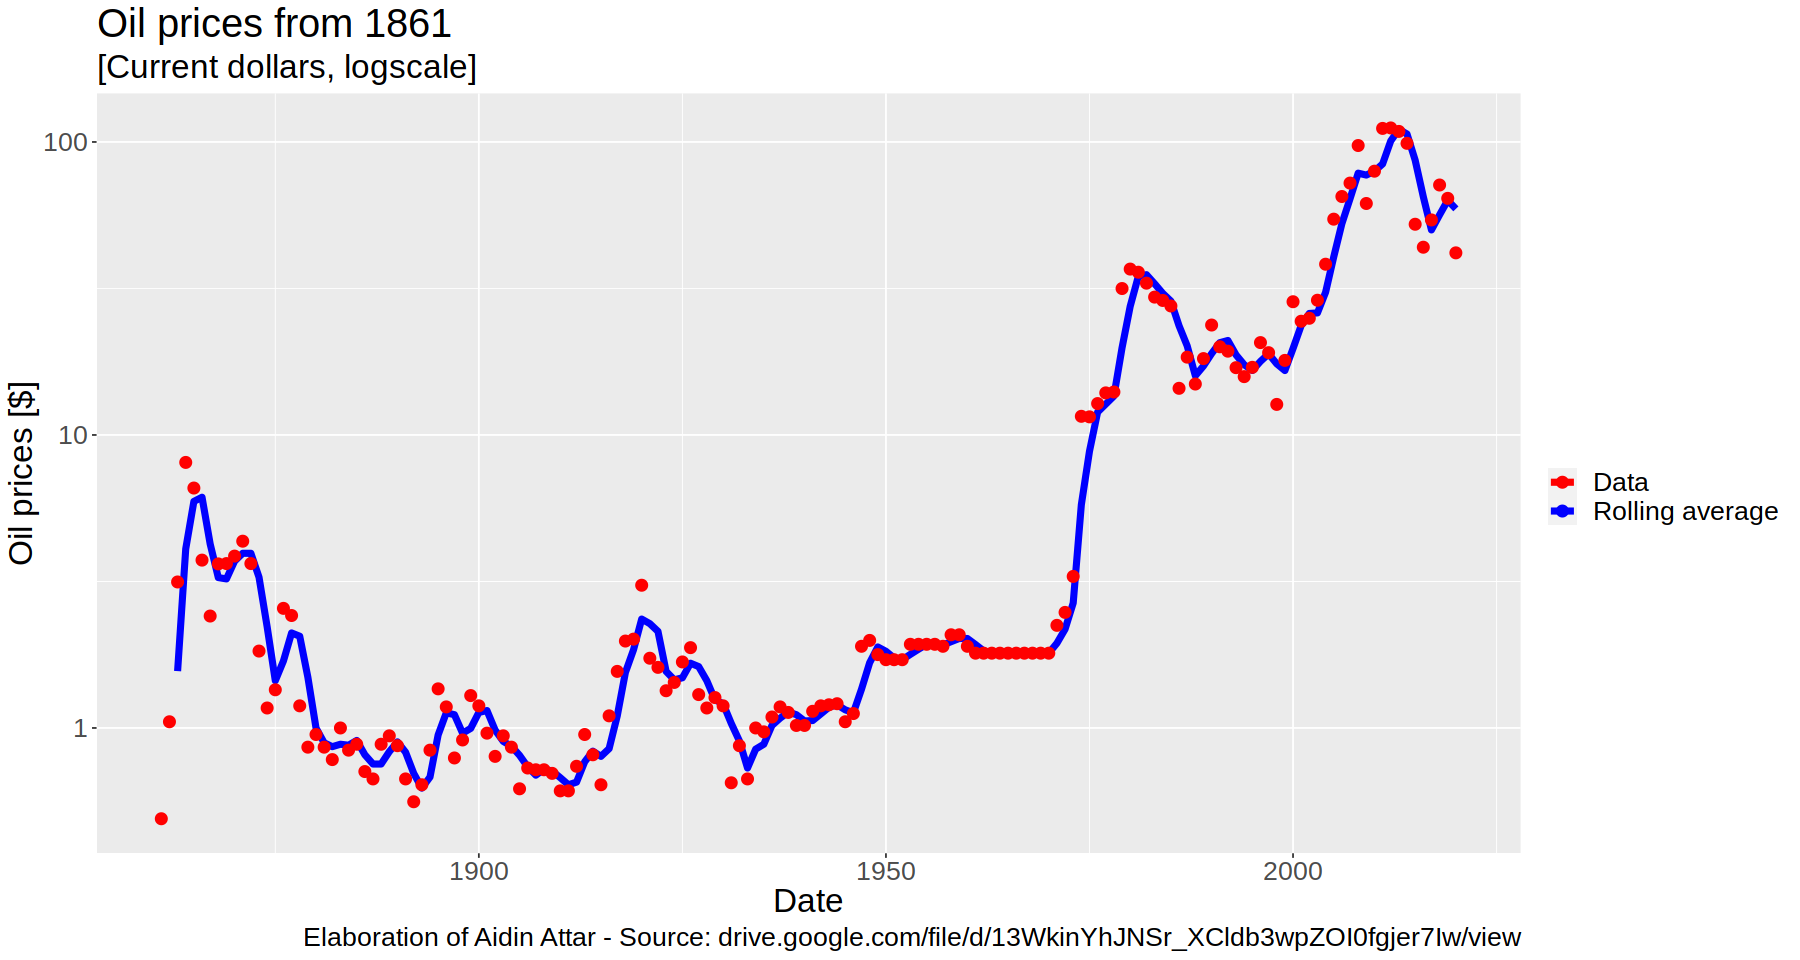

In [38]:
options(repr.plot.width=15, repr.plot.height=8)
colors <- c("Data" = "red", "Rolling average" = "blue")

p1 <- ggplot(data = oil_price, aes(x = Year))
p1 <- p1 + geom_line( aes(y  = Average_price, color = "Rolling average"), size = 2)
p1 <- p1 + geom_point(aes(y  = Price_current_dollar, color = "Data"), size = 3) 
p1 <- p1 + scale_color_manual(values = colors)
p1 <- p1 + labs(x        = "Date",
                y        = "Oil prices [$]",
                title    = "Oil prices from 1861",
                subtitle = "[Current dollars, logscale]",
                color    = "",
                caption = "Elaboration of Aidin Attar - Source: drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view")
p1 <- p1 + theme(text    = element_text(size=20))
p1 <- p1 + scale_y_continuous(trans = 'log10')
p1

In [39]:
max_price_id <- which.max(oil_price$Price_current_dollar)
cat("In", oil_price[max_price_id,"Year"], "oil reached the record price of",  oil_price[max_price_id,"Price_current_dollar"], 
    "american dollars per barrel, due to the wars in Syria, Sudan and Yemen, the sanctions to Iran and the growth after the financial crisis." )

In 2012 oil reached the record price of 111.6697 american dollars per barrel, due to the wars in Syria, Sudan and Yemen, the sanctions to Iran and the growth after the financial crisis.

In [40]:
oil_price$RightDerivative <- c(NA, diff(oil_price$Price_current_dollar))

# compute the central derivative subtracting at each value in position i the value in position i-2
oil_price <- oil_price %>%  mutate(CentralDerivative = Price_current_dollar - lag(Price_current_dollar,2))

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


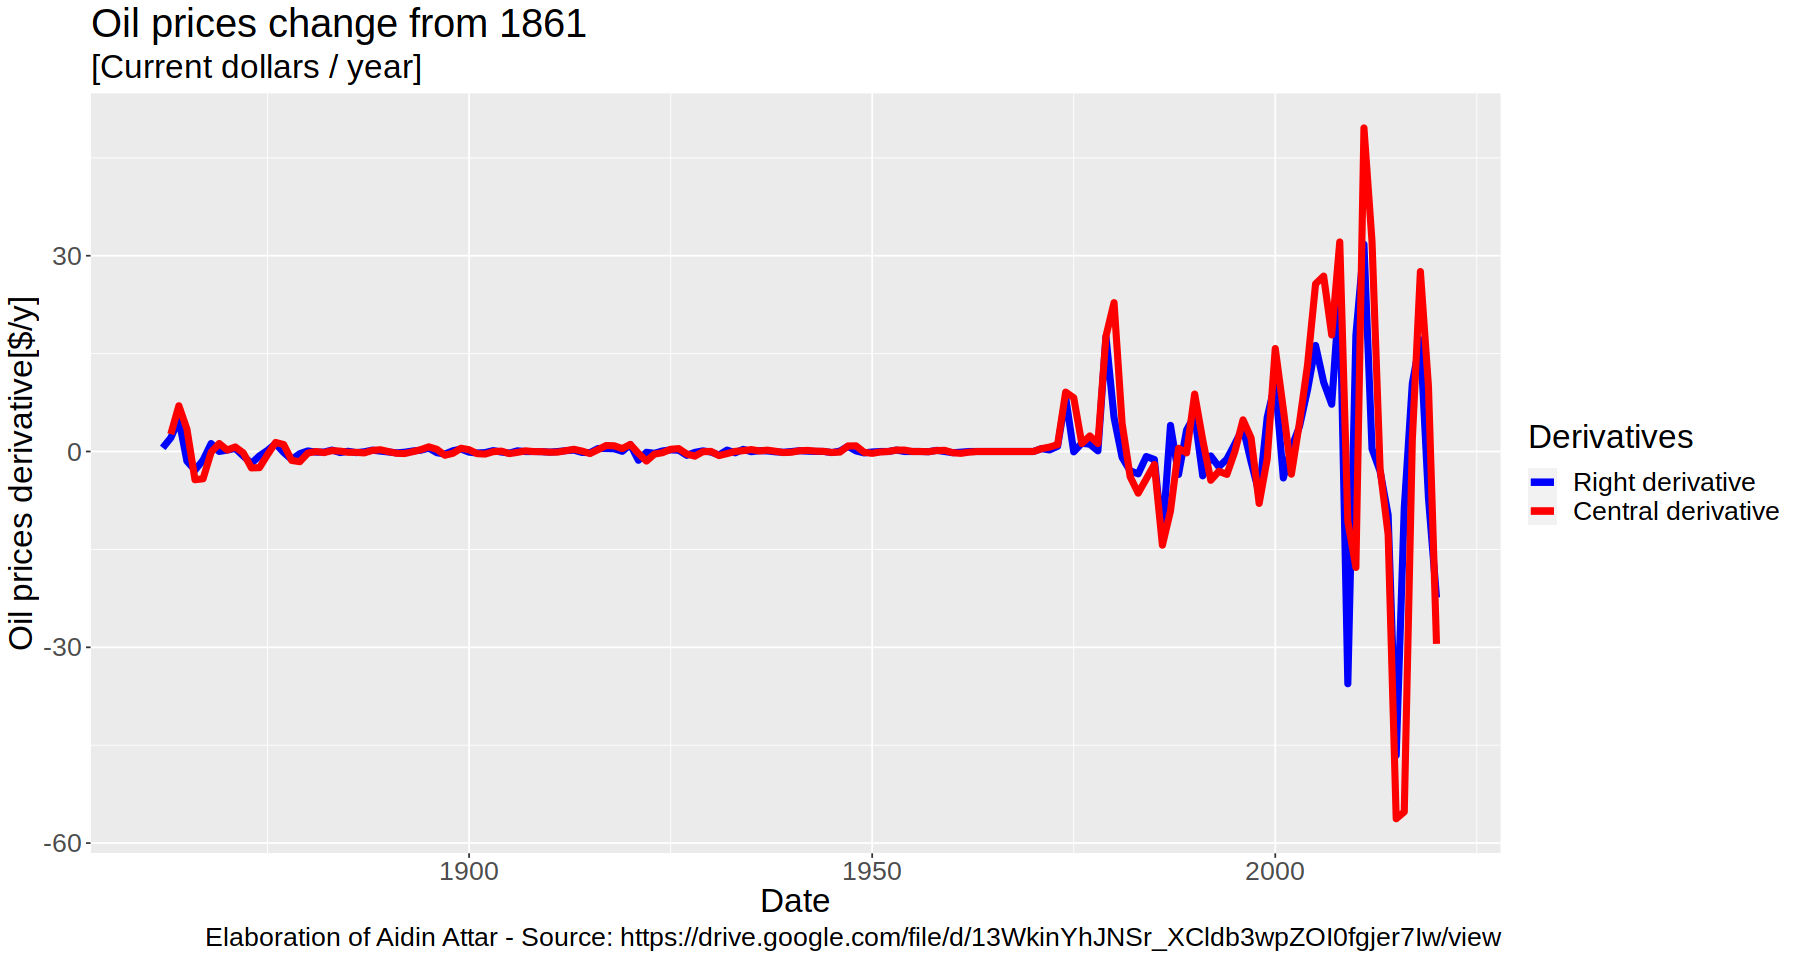

In [41]:
options(repr.plot.width=15, repr.plot.height=8)
colors <- c("Right derivative" = "blue", "Central derivative" = "red")

p1 <- ggplot(data = oil_price, aes(x = Year))
p1 <- p1 + geom_line( aes(y  = RightDerivative, color = "Right derivative"), size = 2)
p1 <- p1 + geom_line( aes(y  = CentralDerivative, color = "Central derivative"), size = 2)
p1 <- p1 + scale_color_manual(values = colors)
p1 <- p1 + labs(x        = "Date",
                y        = "Oil prices derivative[$/y]",
                title    = "Oil prices change from 1861",
                subtitle = "[Current dollars / year]",
                color    = "Derivatives",
                caption = "Elaboration of Aidin Attar - Source: https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view")

p1 <- p1 + theme(text    = element_text(size=20))
p1

# World coal production

In [42]:
fname <- "coal-production-by-country.csv"
coal_production <-  tibble(read_csv(paste(dir, fname, sep="/")))
names(coal_production) <- c('Country', 'Code', 'Year', 'Coal')

head(coal_production, 10)

Rows: 11528 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (2): Year, Coal production (TWh)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Code,Year,Coal
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


Number of countries available:	 175

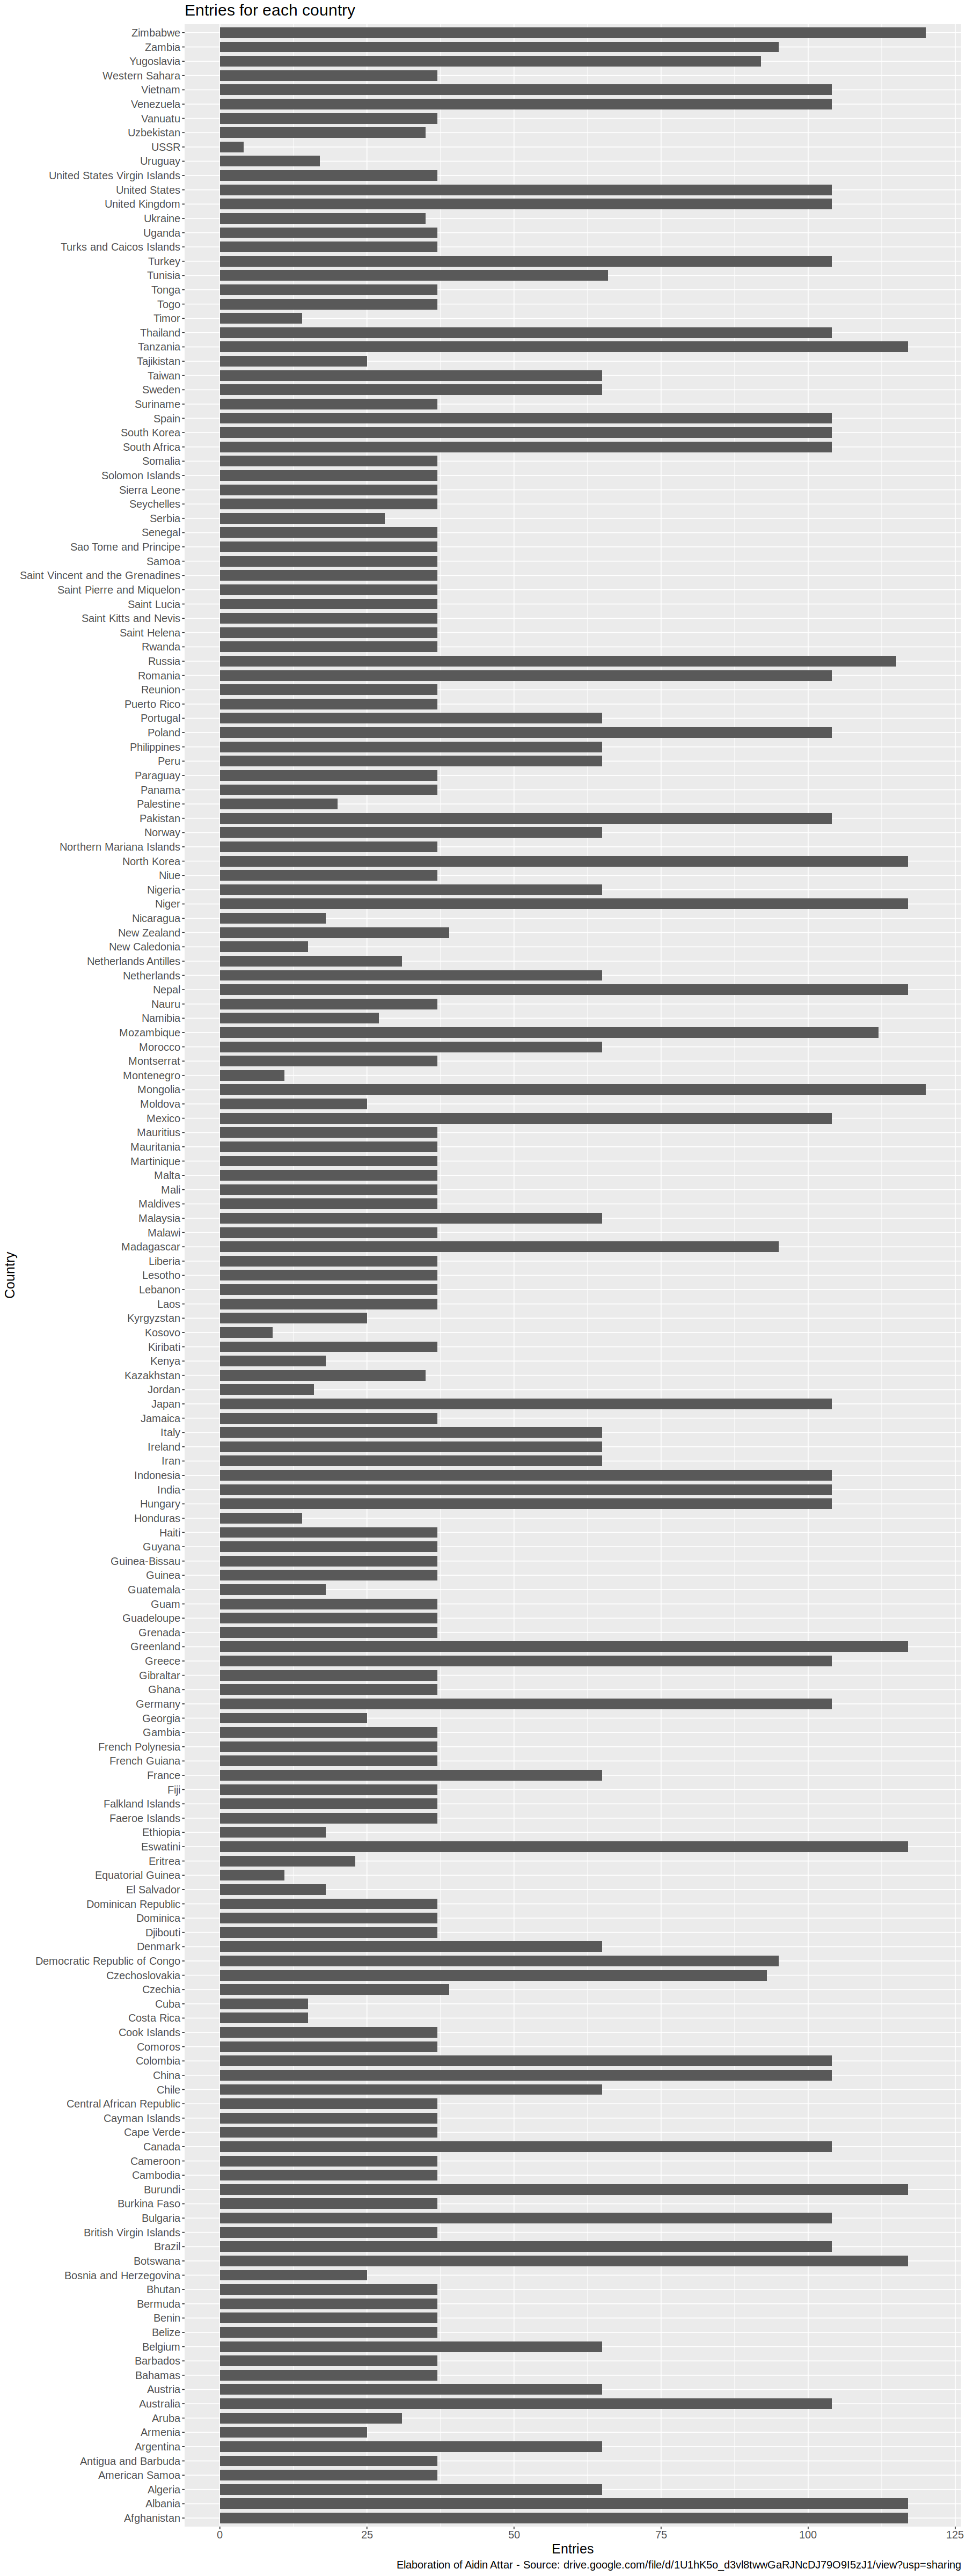

In [43]:
# remove data of non-country entries (WORLD; CONTINENTS ...)
coal_production <- filter(coal_production, Code!="OWID_WRL")

# table(coal_production$Country) creates an object similar to a python dict with
# for each entry in the column Country counts the repetition: take the length of it
# gives the total number of different entries
cat("Number of countries available:\t",length(table(coal_production$Country)))

# plot
options(repr.plot.width=15, repr.plot.height=40)

p1 <- ggplot(data = as.data.frame(table(coal_production$Country)), aes(x=Var1, y=Freq))
p1 <- p1 + geom_col(width = .75)
p1 <- p1 + labs(x        = "Country",
                y        = "Entries",
                title    = "Entries for each country",
                caption  = "Elaboration of Aidin Attar - Source: drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing")
p1 <- p1 + theme(text    = element_text(size=15))
p1 <- p1 + coord_flip()
#p1 <- p1 + scale_y_continuous(trans = 'log10')
p1

In [44]:
# select only data after 1970
coal_prod_1970 <- filter(coal_production, Year>=1970)

In [45]:
# group data by country and then collapse all the row in each group in one row containing just the 
# sum of column Coal, and the sort them descending 
cat("Table: top 5 countries by production of coal from 1970")
head(coal_prod_1970 %>% group_by(Country) %>% summarise(Coal = sum(Coal)) %>% arrange(desc(Coal)), 5)

Table: top 5 countries by production of coal from 1970

Country,Coal
<chr>,<dbl>
China,459564.65
United States,226068.84
Russia,101908.49
Australia,83077.07
India,77043.45


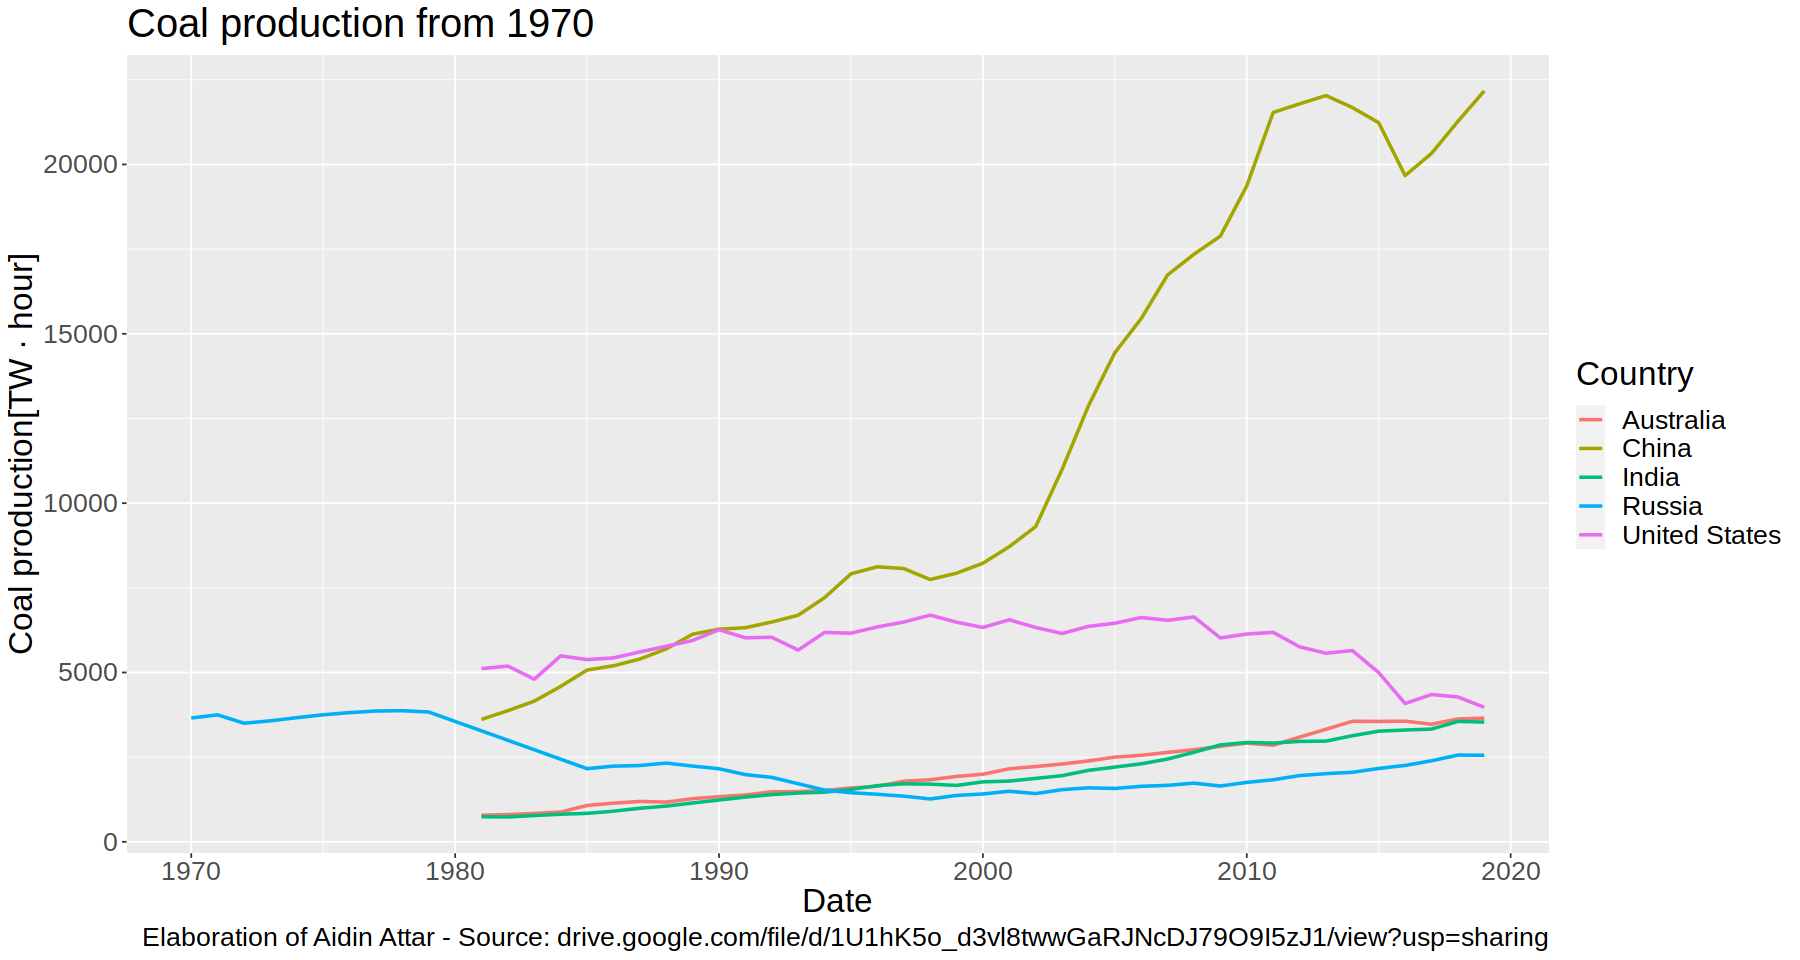

In [46]:
options(repr.plot.width=15, repr.plot.height=8)
countries <- c("China", "United States", "India", "Russia", "Australia")

p1 <- ggplot(data = filter(coal_prod_1970, Country %in% countries), aes(Year, Coal, group = Country))
p1 <- p1 + geom_line(aes(col = Country), size = 1)

p1 <- p1 + labs(x        = "Date",
                y        = "Coal production[TW · hour]",
                title    = "Coal production from 1970",
                color    = "Country",
                caption  = "Elaboration of Aidin Attar - Source: drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing")

p1 <- p1 + theme(text    = element_text(size=20))
p1

Rows: 11528 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (2): Year, Coal production (TWh)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


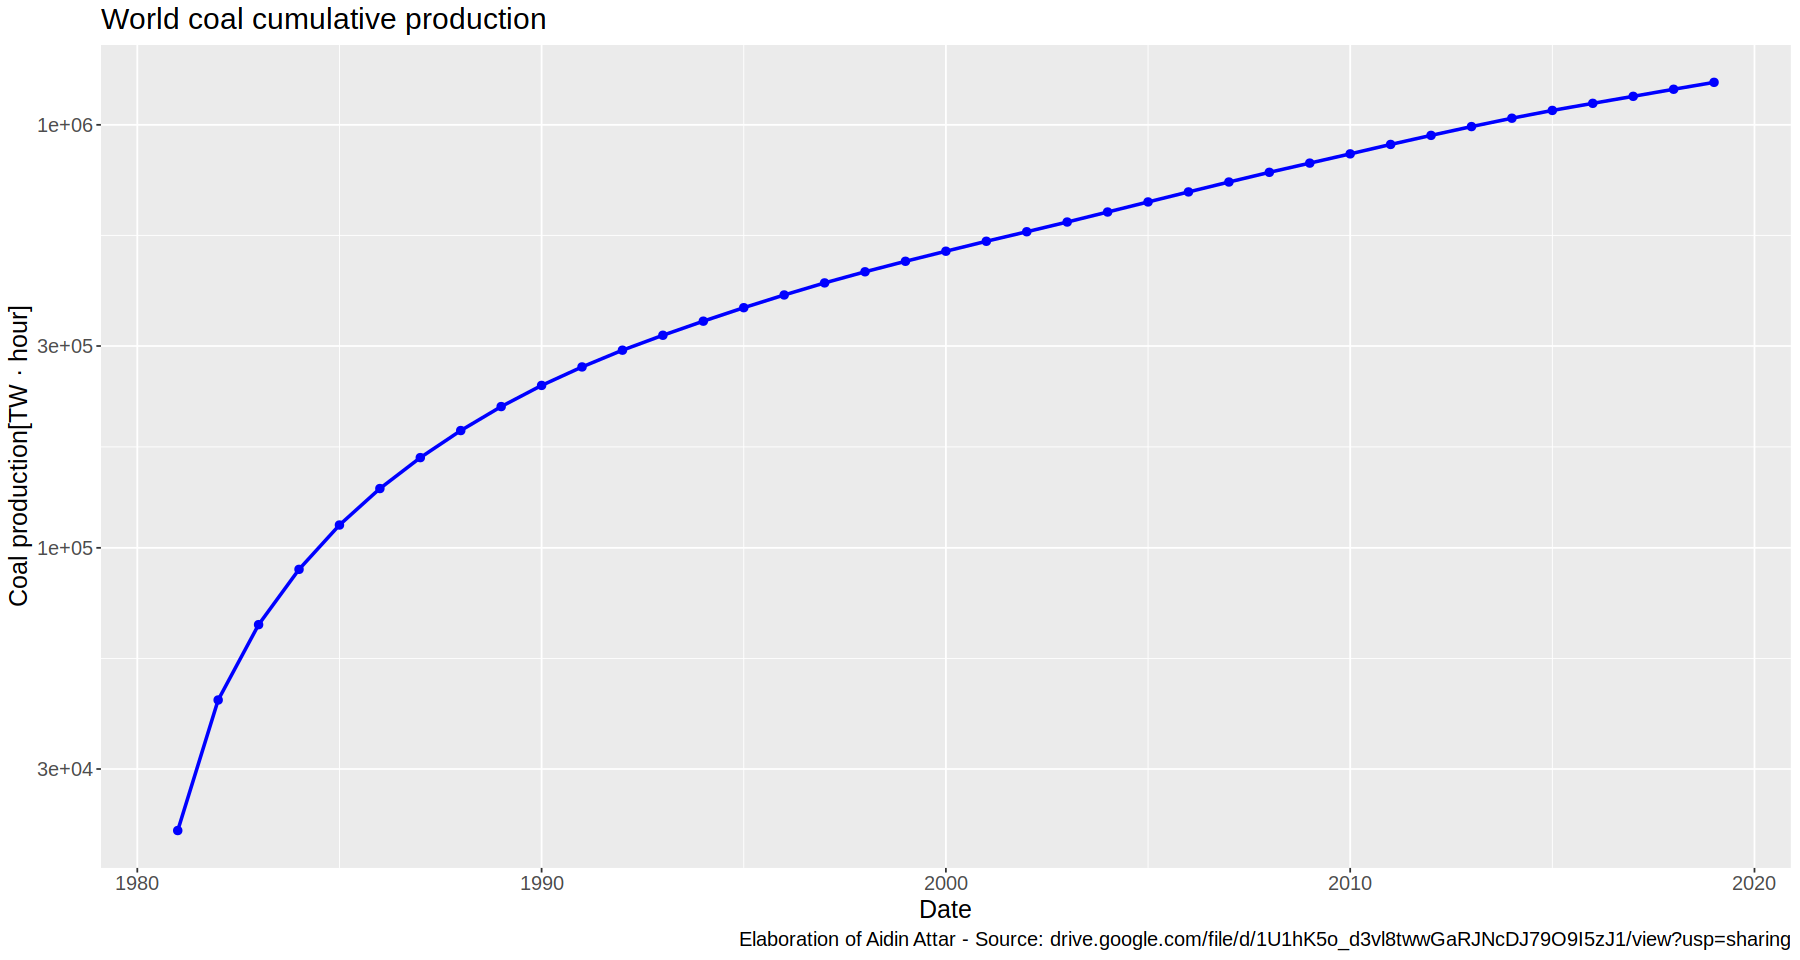

In [47]:
# removed from coal_production world: need to re-input it
coal_production <-  tibble(read_csv(paste(dir, fname, sep="/")))
names(coal_production) <- c('Country', 'Code', 'Year', 'Coal')
coal_production_world <- filter(coal_production, Country=="World")

options(repr.plot.width=15, repr.plot.height=8)

p1 <- ggplot(data = coal_production_world, aes(x = Year, y = cumsum(Coal)))
p1 <- p1 + geom_line( color = "blue", size = 1)
p1 <- p1 + geom_point(color = "blue", size = 2)

p1 <- p1 + labs(x        = "Date",
                y        = "Coal production[TW · hour]",
                title    = "World coal cumulative production",
                caption  = "Elaboration of Aidin Attar - Source: drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing")

p1 <- p1 + theme(text    = element_text(size=15))
p1 <- p1 + scale_y_continuous(trans = 'log10')
p1

# Covid-19 Vaccine data

In [48]:
URL   <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations"
fname <- "vaccinations-by-manufacturer.csv"
target <- paste(URL, fname, sep="/")
download.file(target, destfile=paste(dir, fname, sep="/"), method='curl')

vaccine_data <- read_csv(file = paste(dir, fname, sep="/"))
vaccine_data

Rows: 35623 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Argentina,2020-12-29,Moderna,2
Argentina,2020-12-29,Oxford/AstraZeneca,3
Argentina,2020-12-29,Sinopharm/Beijing,1
Argentina,2020-12-29,Sputnik V,20481
Argentina,2020-12-30,Moderna,2
Argentina,2020-12-30,Oxford/AstraZeneca,3
Argentina,2020-12-30,Sinopharm/Beijing,1
Argentina,2020-12-30,Sputnik V,40583
Argentina,2020-12-31,Moderna,2


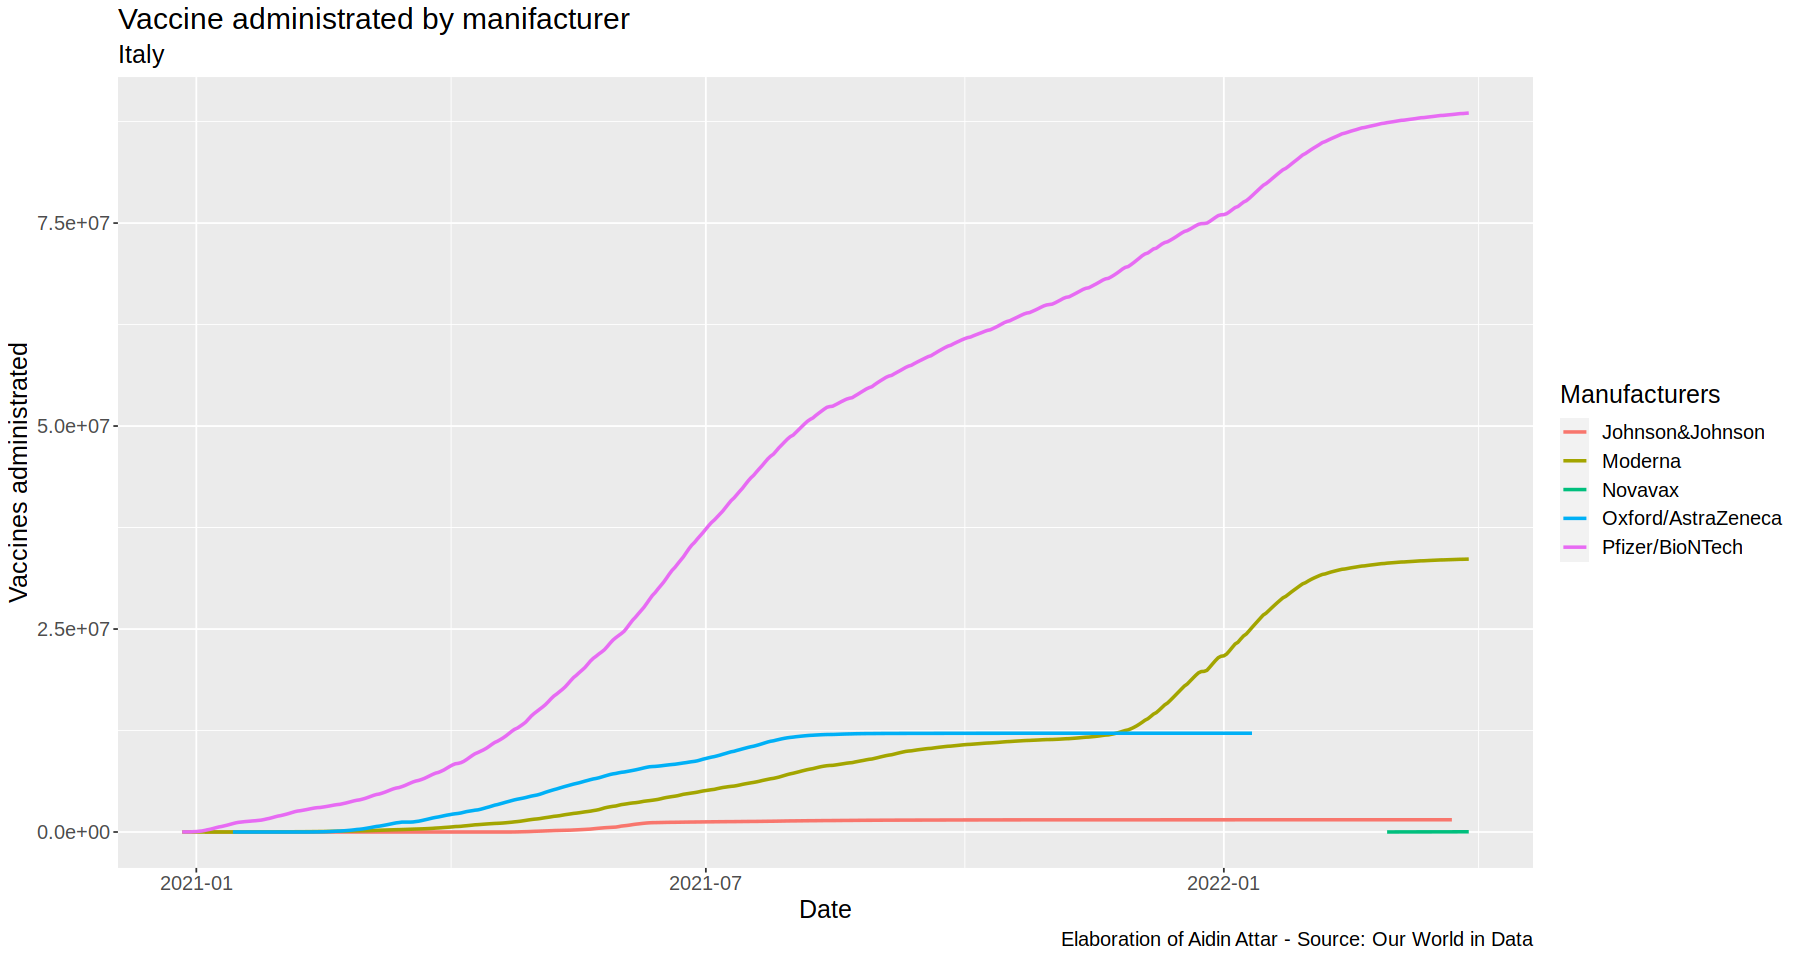

In [49]:
italy_vaccine <- filter(vaccine_data, location=="Italy")

options(repr.plot.width=15, repr.plot.height=8)
manufacturers <- unique(italy_vaccine$vaccine)

pita <- ggplot(data = filter(italy_vaccine, vaccine %in% manufacturers), aes(date, total_vaccinations, group = vaccine))

pita <- pita + geom_line(aes(col = vaccine), size = 1)


pita <- pita + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Vaccine administrated by manifacturer",
                subtitle = "Italy",
                color    = "Manufacturers",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

pita <- pita + theme(text    = element_text(size=15))
pita

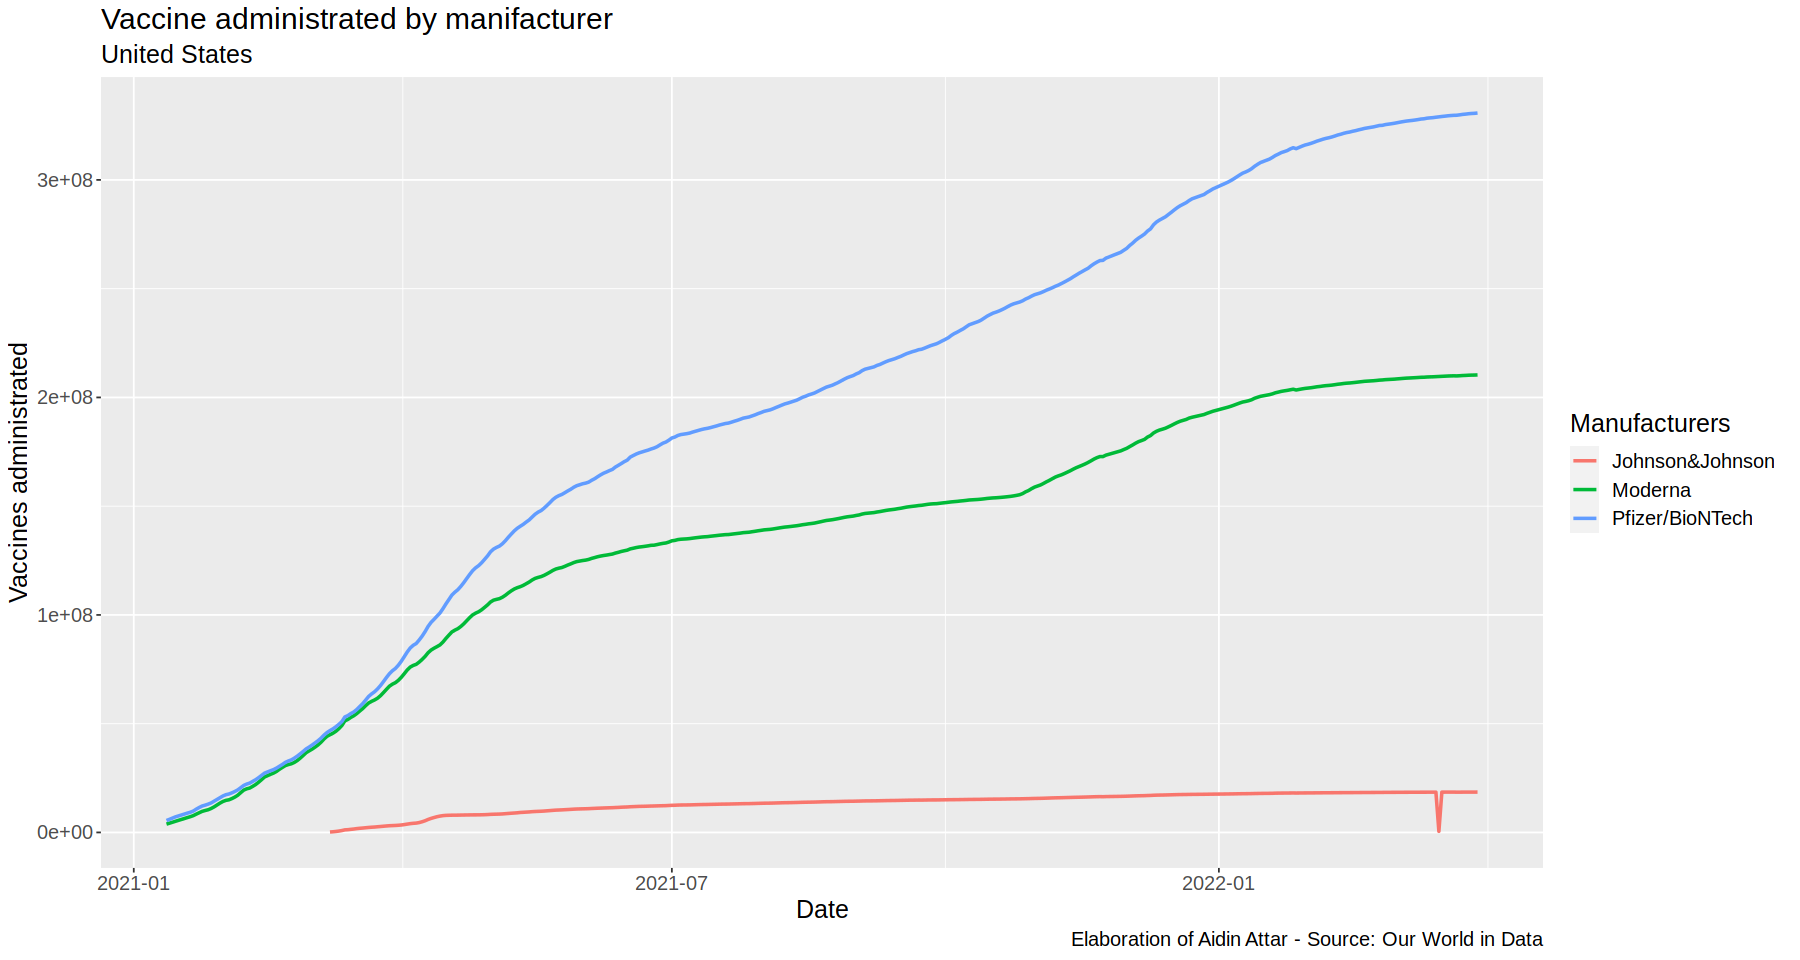

In [50]:
usa_vaccine <- filter(vaccine_data, location=="United States")

options(repr.plot.width=15, repr.plot.height=8)
manufacturers <- unique(usa_vaccine$vaccine)

pusa <- ggplot(data = filter(usa_vaccine, vaccine %in% manufacturers), aes(date, total_vaccinations, group = vaccine))

pusa <- pusa + geom_line(aes(col = vaccine), size = 1)


pusa <- pusa + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Vaccine administrated by manifacturer",
                subtitle = "United States",
                color    = "Manufacturers",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

pusa <- pusa + theme(text    = element_text(size=15))
pusa

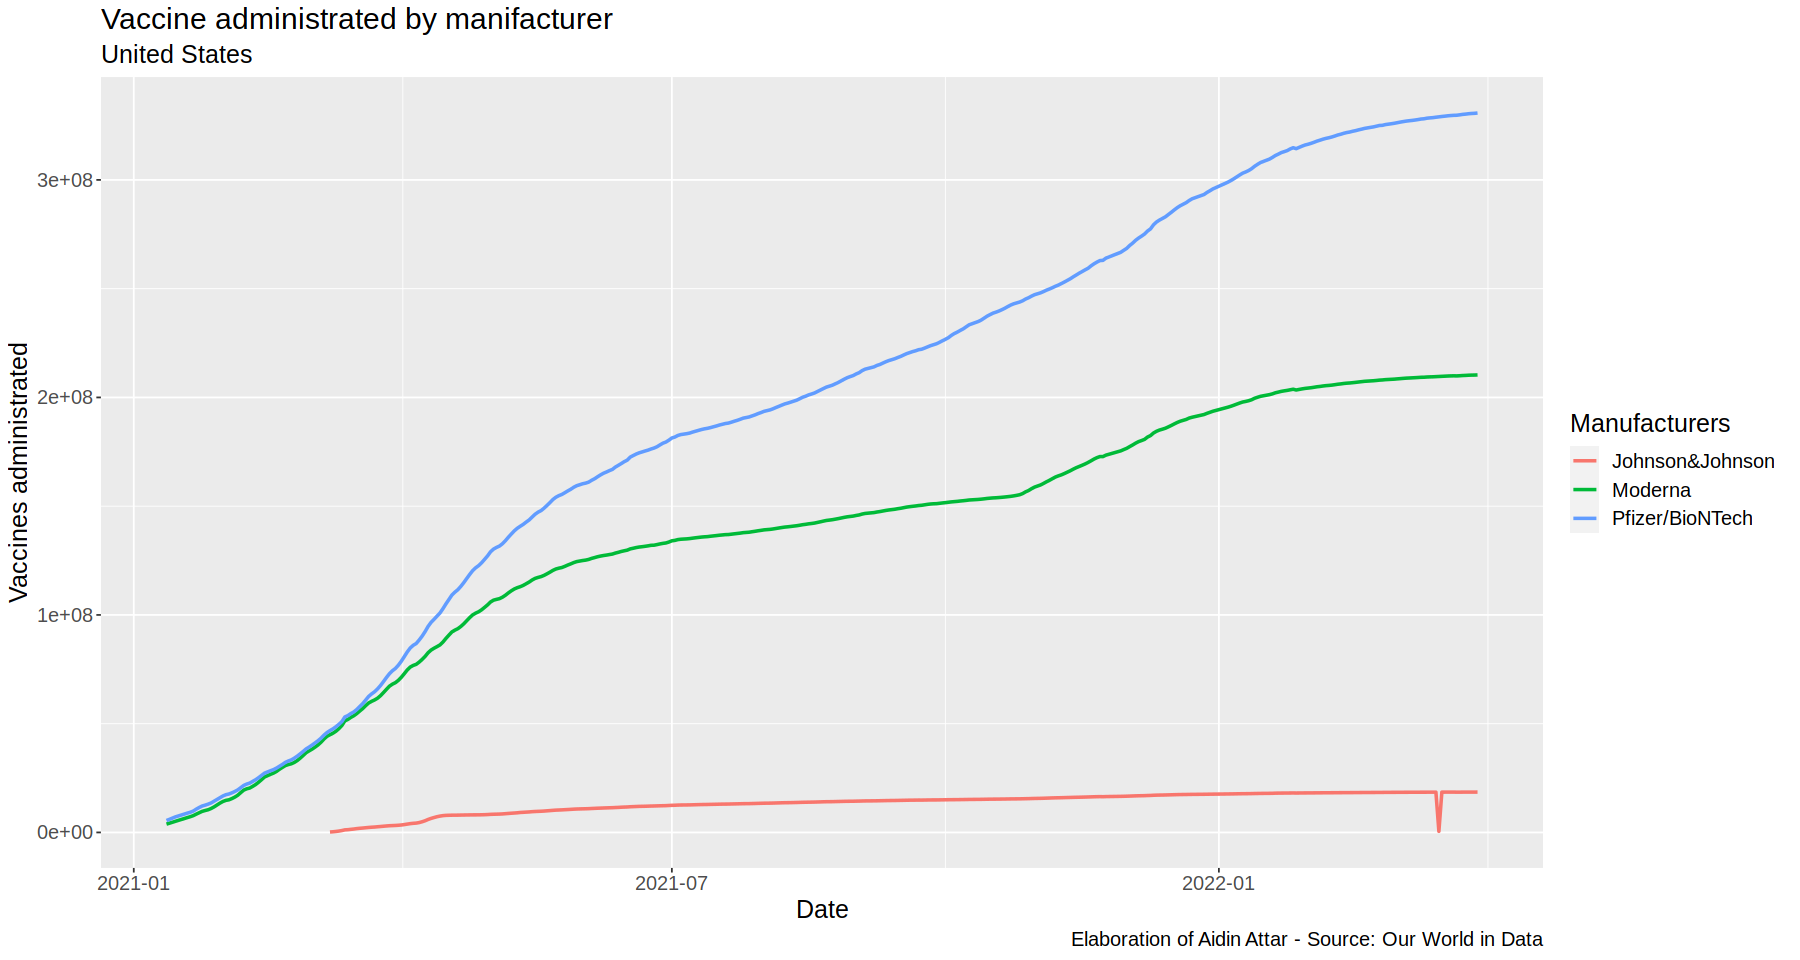

In [51]:
ger_vaccine <- filter(vaccine_data, location=="Germany")

options(repr.plot.width=15, repr.plot.height=8)
manufacturers <- unique(ger_vaccine$vaccine)

pger <- ggplot(data = filter(ger_vaccine, vaccine %in% manufacturers), aes(date, total_vaccinations, group = vaccine))

pger <- pger + geom_line(aes(col = vaccine), size = 1)


pger <- pger + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Vaccine administrated by manifacturer",
                subtitle = "Germany",
                color    = "Manufacturers",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

pusa <- pusa + theme(text    = element_text(size=15))
pusa

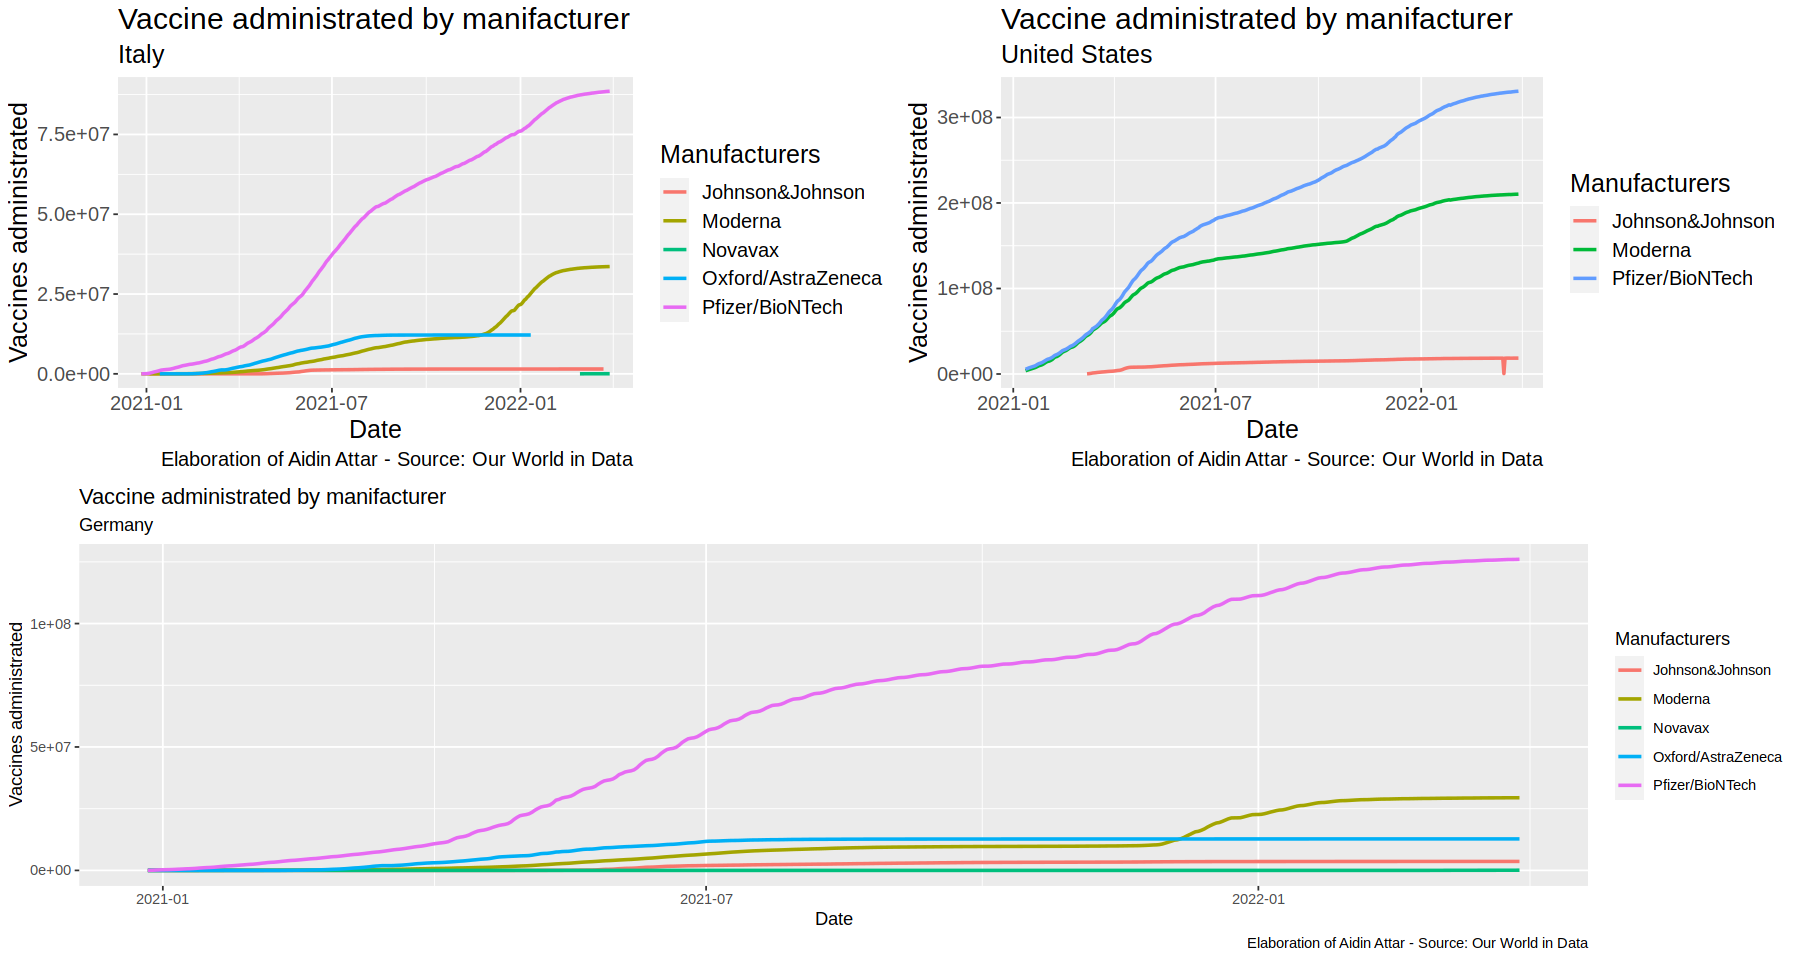

In [52]:
grid.arrange(arrangeGrob(pita, pusa, ncol=2), pger, nrow = 2)

In [53]:
# adding rows for missing dates for each manifacturer 
# fill with previous data (since total_vaccinations represents the cumulative)

italy_vaccine <- italy_vaccine %>% group_by(vaccine) %>% complete(date = seq(date[1], Sys.Date(), by = "1 day")) %>% fill( total_vaccinations, .direction = "down") %>% fill(location, .direction = "down")
usa_vaccine   <-   usa_vaccine %>% group_by(vaccine) %>% complete(date = seq(date[1], Sys.Date(), by = "1 day")) %>% fill( total_vaccinations, .direction = "down") %>% fill(location, .direction = "down")
ger_vaccine   <-   ger_vaccine %>% group_by(vaccine) %>% complete(date = seq(date[1], Sys.Date(), by = "1 day")) %>% fill( total_vaccinations, .direction = "down") %>% fill(location, .direction = "down")

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 7 row(s) containing missing values (geom_path).”


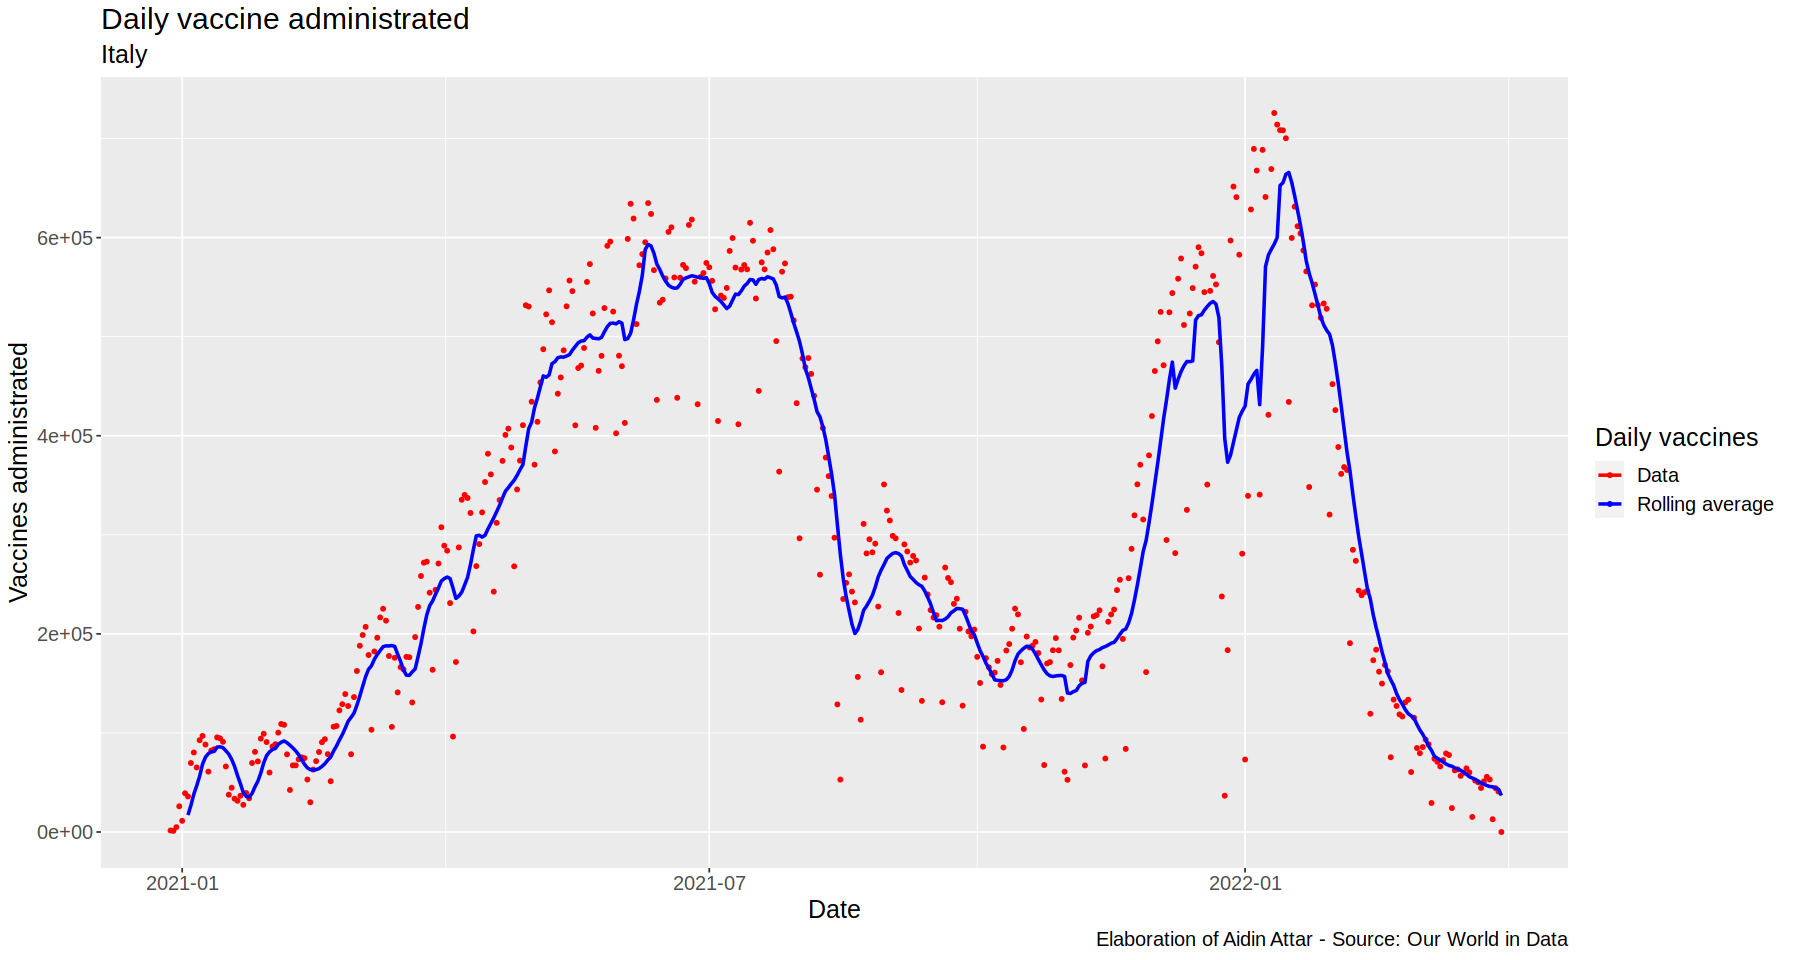

In [54]:
italy_day             <- italy_vaccine %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
italy_day$daily_doses <- c(NA, diff(italy_day$total_vaccinations))

# compute moving average of the prices with a 7 days window
italy_day$avg_doses <- cbind(roll = rollmeanr(italy_day$daily_doses, 7, fill = NA))

options(repr.plot.width=15, repr.plot.height=8)
colors <- c("Data" = "red", "Rolling average" = "blue")

p1 <- ggplot(data = italy_day, aes(date))

p1 <- p1 + geom_point(aes(y=daily_doses, color="Data"), size = 1)
p1 <- p1 + geom_line(aes(y=avg_doses, color="Rolling average"), size = 1)


p1 <- p1 + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Daily vaccine administrated",
                subtitle = "Italy",
                color    = "Daily vaccines",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + scale_color_manual(values = colors)
p1 <- p1 + theme(text    = element_text(size=15))
p1

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 7 row(s) containing missing values (geom_path).”


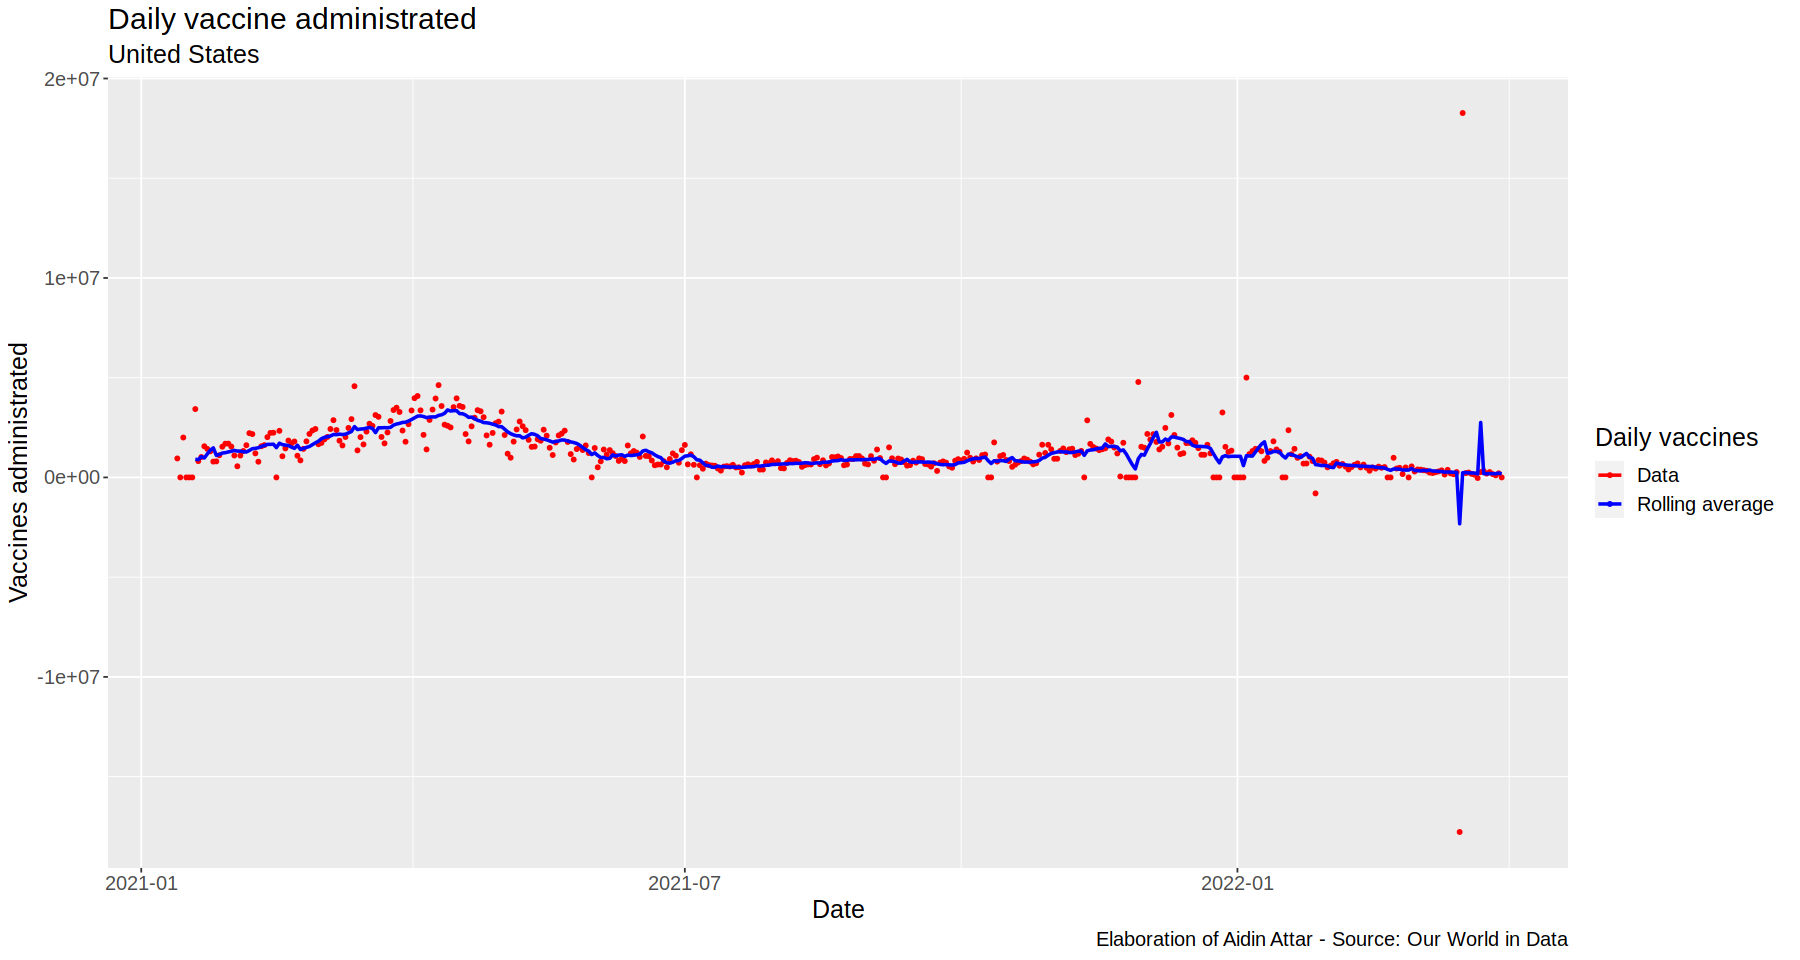

In [55]:
usa_day             <- usa_vaccine %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
usa_day$daily_doses <- c(NA, diff(usa_day$total_vaccinations))

# compute moving average of the prices with a 7 days window
usa_day$avg_doses <- cbind(roll = rollmeanr(usa_day$daily_doses, 7, fill = NA))

options(repr.plot.width=15, repr.plot.height=8)
colors <- c("Data" = "red", "Rolling average" = "blue")

p1 <- ggplot(data = usa_day, aes(date))

p1 <- p1 + geom_point(aes(y=daily_doses, color="Data"), size = 1)
p1 <- p1 + geom_line(aes(y=avg_doses, color="Rolling average"), size = 1)


p1 <- p1 + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Daily vaccine administrated",
                subtitle = "United States",
                color    = "Daily vaccines",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + scale_color_manual(values = colors)
p1 <- p1 + theme(text    = element_text(size=15))
p1

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 7 row(s) containing missing values (geom_path).”


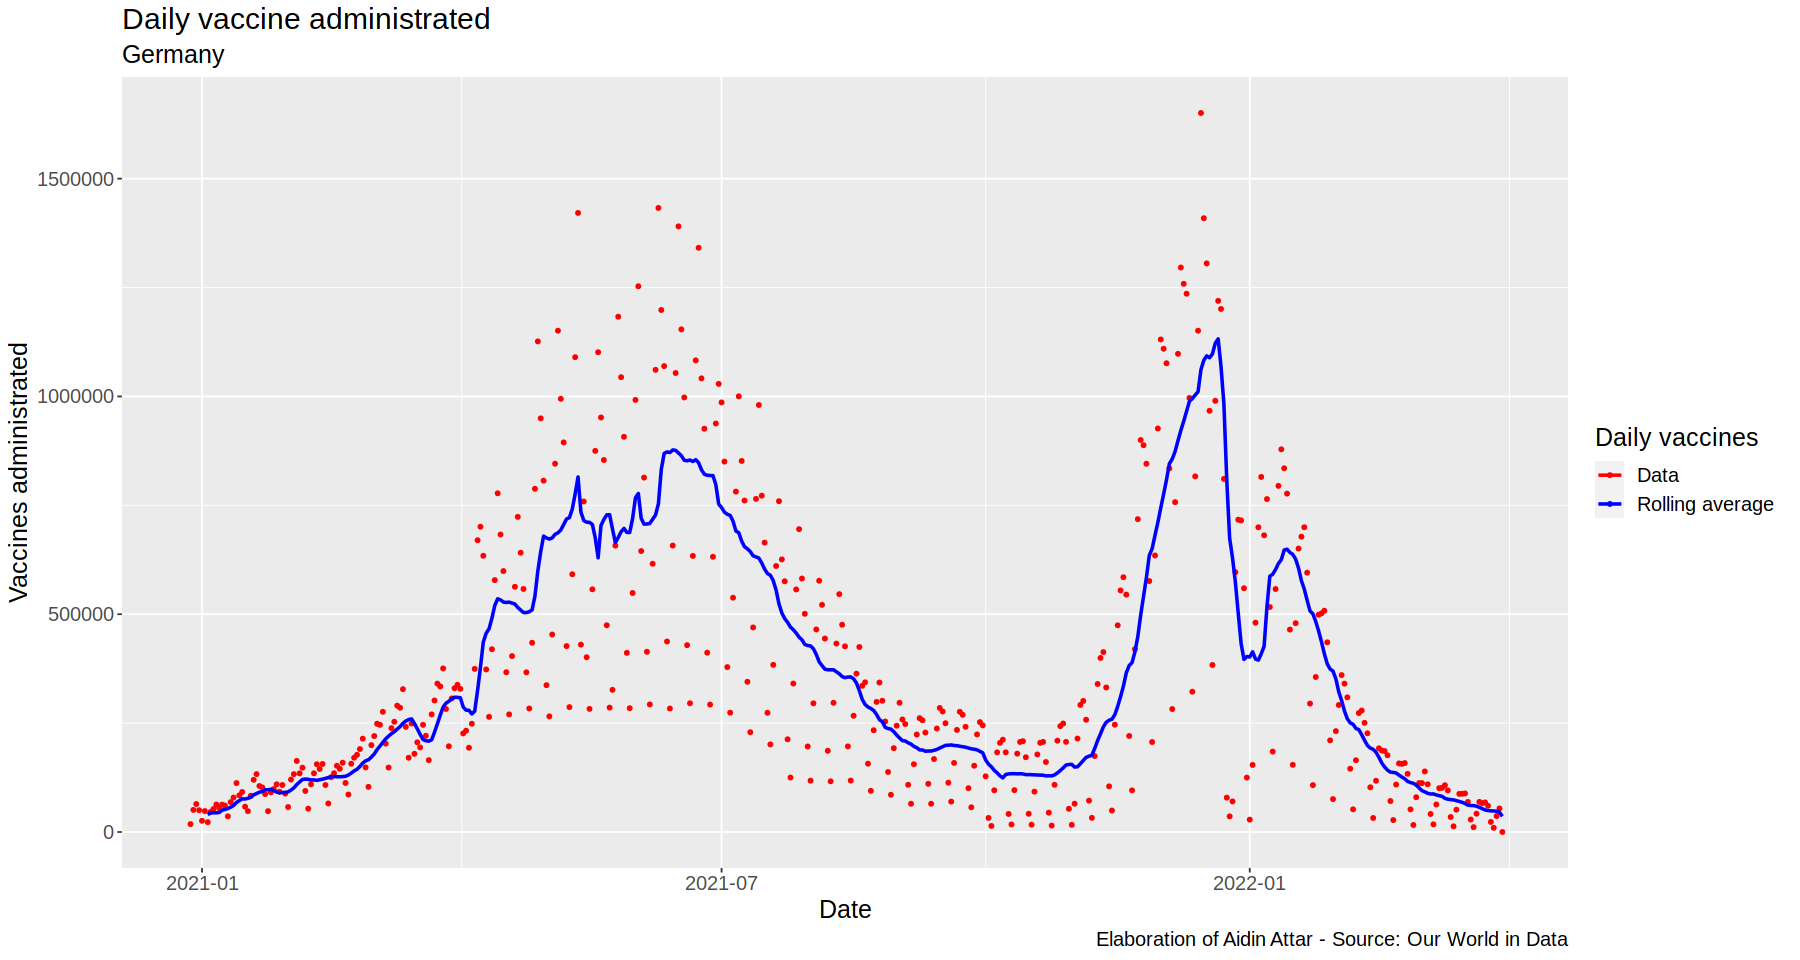

In [56]:
ger_day             <- ger_vaccine %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
ger_day$daily_doses <- c(NA, diff(ger_day$total_vaccinations))

# compute moving average of the prices with a 7 days window
ger_day$avg_doses <- cbind(roll = rollmeanr(ger_day$daily_doses, 7, fill = NA))

options(repr.plot.width=15, repr.plot.height=8)
colors <- c("Data" = "red", "Rolling average" = "blue")

p1 <- ggplot(data = ger_day, aes(date))

p1 <- p1 + geom_point(aes(y=daily_doses, color="Data"), size = 1)
p1 <- p1 + geom_line(aes(y=avg_doses, color="Rolling average"), size = 1)


p1 <- p1 + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Daily vaccine administrated",
                subtitle = "Germany",
                color    = "Daily vaccines",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + scale_color_manual(values = colors)
p1 <- p1 + theme(text    = element_text(size=15))
p1

In [57]:
URL   <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations"
fname <- "vaccinations.csv"
target <- paste(URL, fname, sep="/")
cat("target:", target)
download.file(target, destfile=paste(dir, fname, sep="/"), method='curl')

vaccinations <- read_csv(file = paste(dir, fname, sep="/"))
vaccinations

target: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv

Rows: 92029 Columns: 16
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): location, iso_code
dbl  (13): total_vaccinations, people_vaccinated, people_fully_vaccinated, t...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0.00,0.00,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-28,8200,8200,NA,NA,NA,1367,0.02,0.02,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-03-01,NA,NA,NA,NA,NA,1580,NA,NA,NA,NA,40,1580,0.004
Afghanistan,AFG,2021-03-02,NA,NA,NA,NA,NA,1794,NA,NA,NA,NA,45,1794,0.005


In [58]:
european_countries <- c("Albania"        , "Austria"        , "Belarus"  , "Belgium"   , "Bosnia and Herzegovina", 
                        "Bulgaria"       , "Croatia"        , "Cyprus"   , "Czechia"   , "Denmark"               ,
                        "Estonia"        , "Finland"        , "France"   , "Germany"   , "Greece"                ,
                        "Kosovo"         , "Liechtenstein"  , "Lithuania", "Luxembourg", "Hungary"               ,
                        "Iceland"        , "Italy"          , "Moldova"  , "Monaco"    , "Montenegro"            ,
                        "Northern Cyprus", "Norway"         , "Poland"   , "Portugal"  , "Romania"               ,
                        "Russia"         , "San Marino"     , "Serbia"   , "Slovakia"  , "Slovenia"              , 
                        "Ukraine"        , "United Kingdom" )
large_euro_countries <- c("Italy", "Germany", "France", "Spain", "United Kingdom")

Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


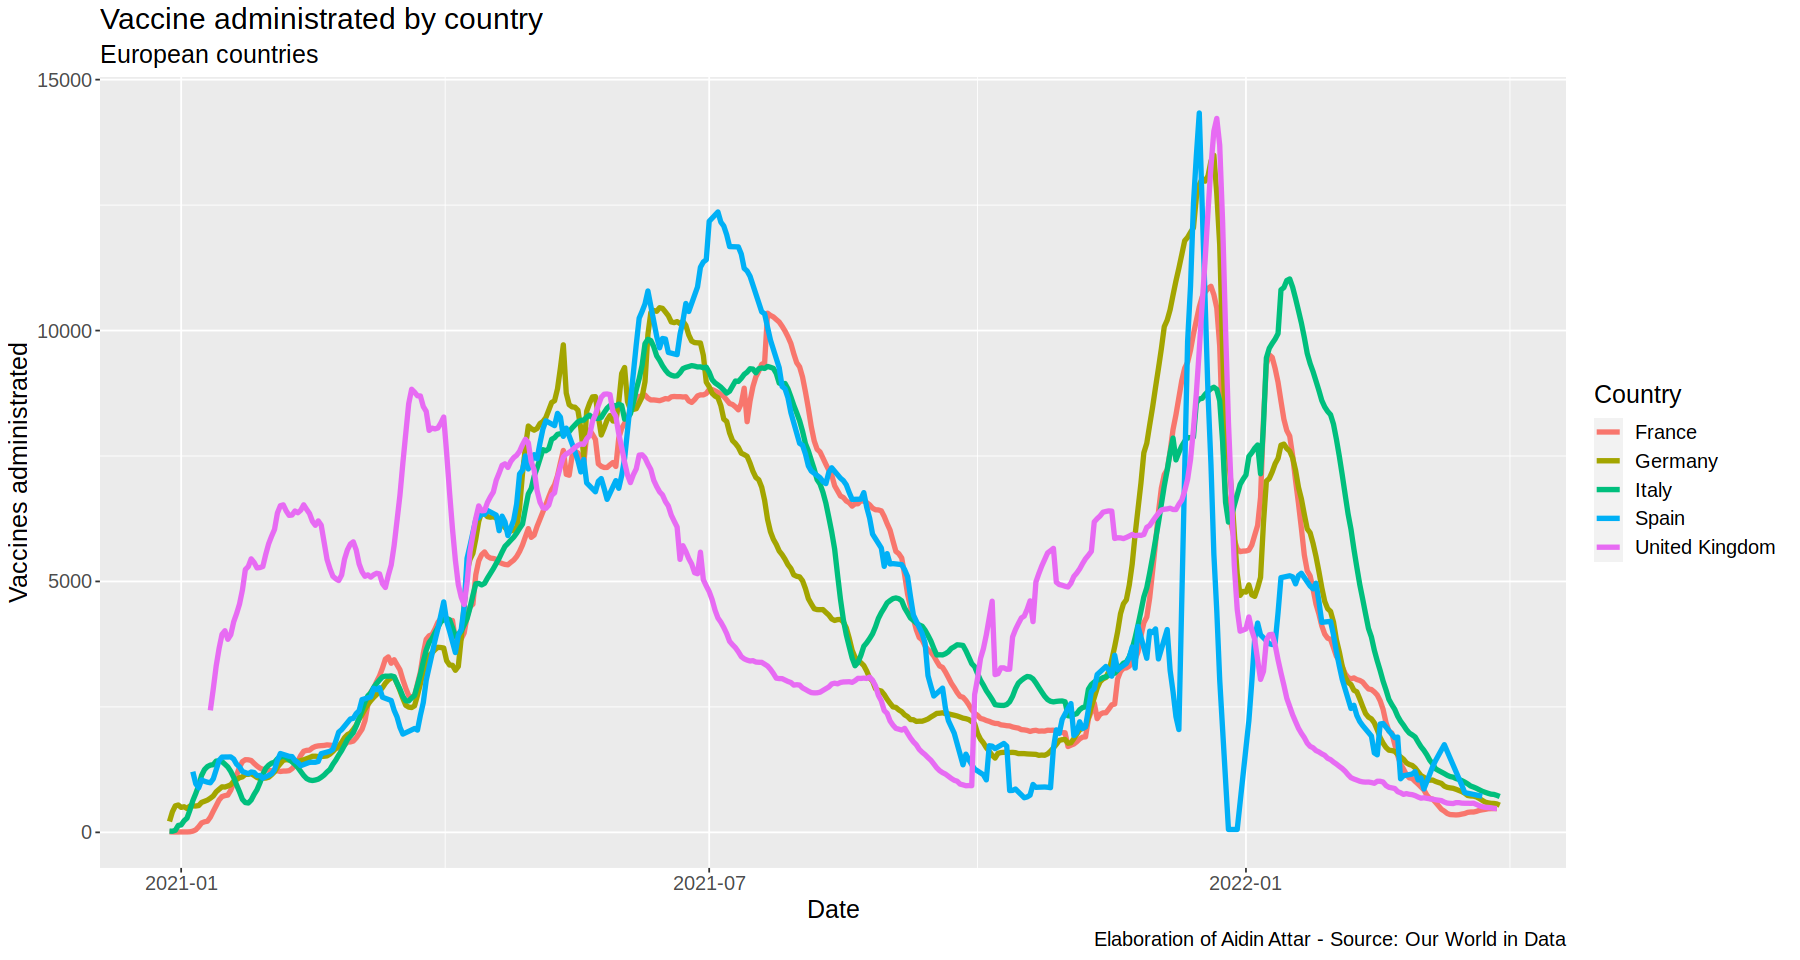

In [59]:
options(repr.plot.width=15, repr.plot.height=8)

p1 <- ggplot(data = filter(vaccinations, location %in% large_euro_countries), aes(date, daily_vaccinations_per_million, group = location))
p1 <- p1 + geom_line(aes(col = location), size=1.5)

p1 <- p1 + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Vaccine administrated by country",
                subtitle = "European countries",
                color    = "Country",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + theme(text    = element_text(size=15))
p1

### Bar charts of the number of vaccinated per hundred

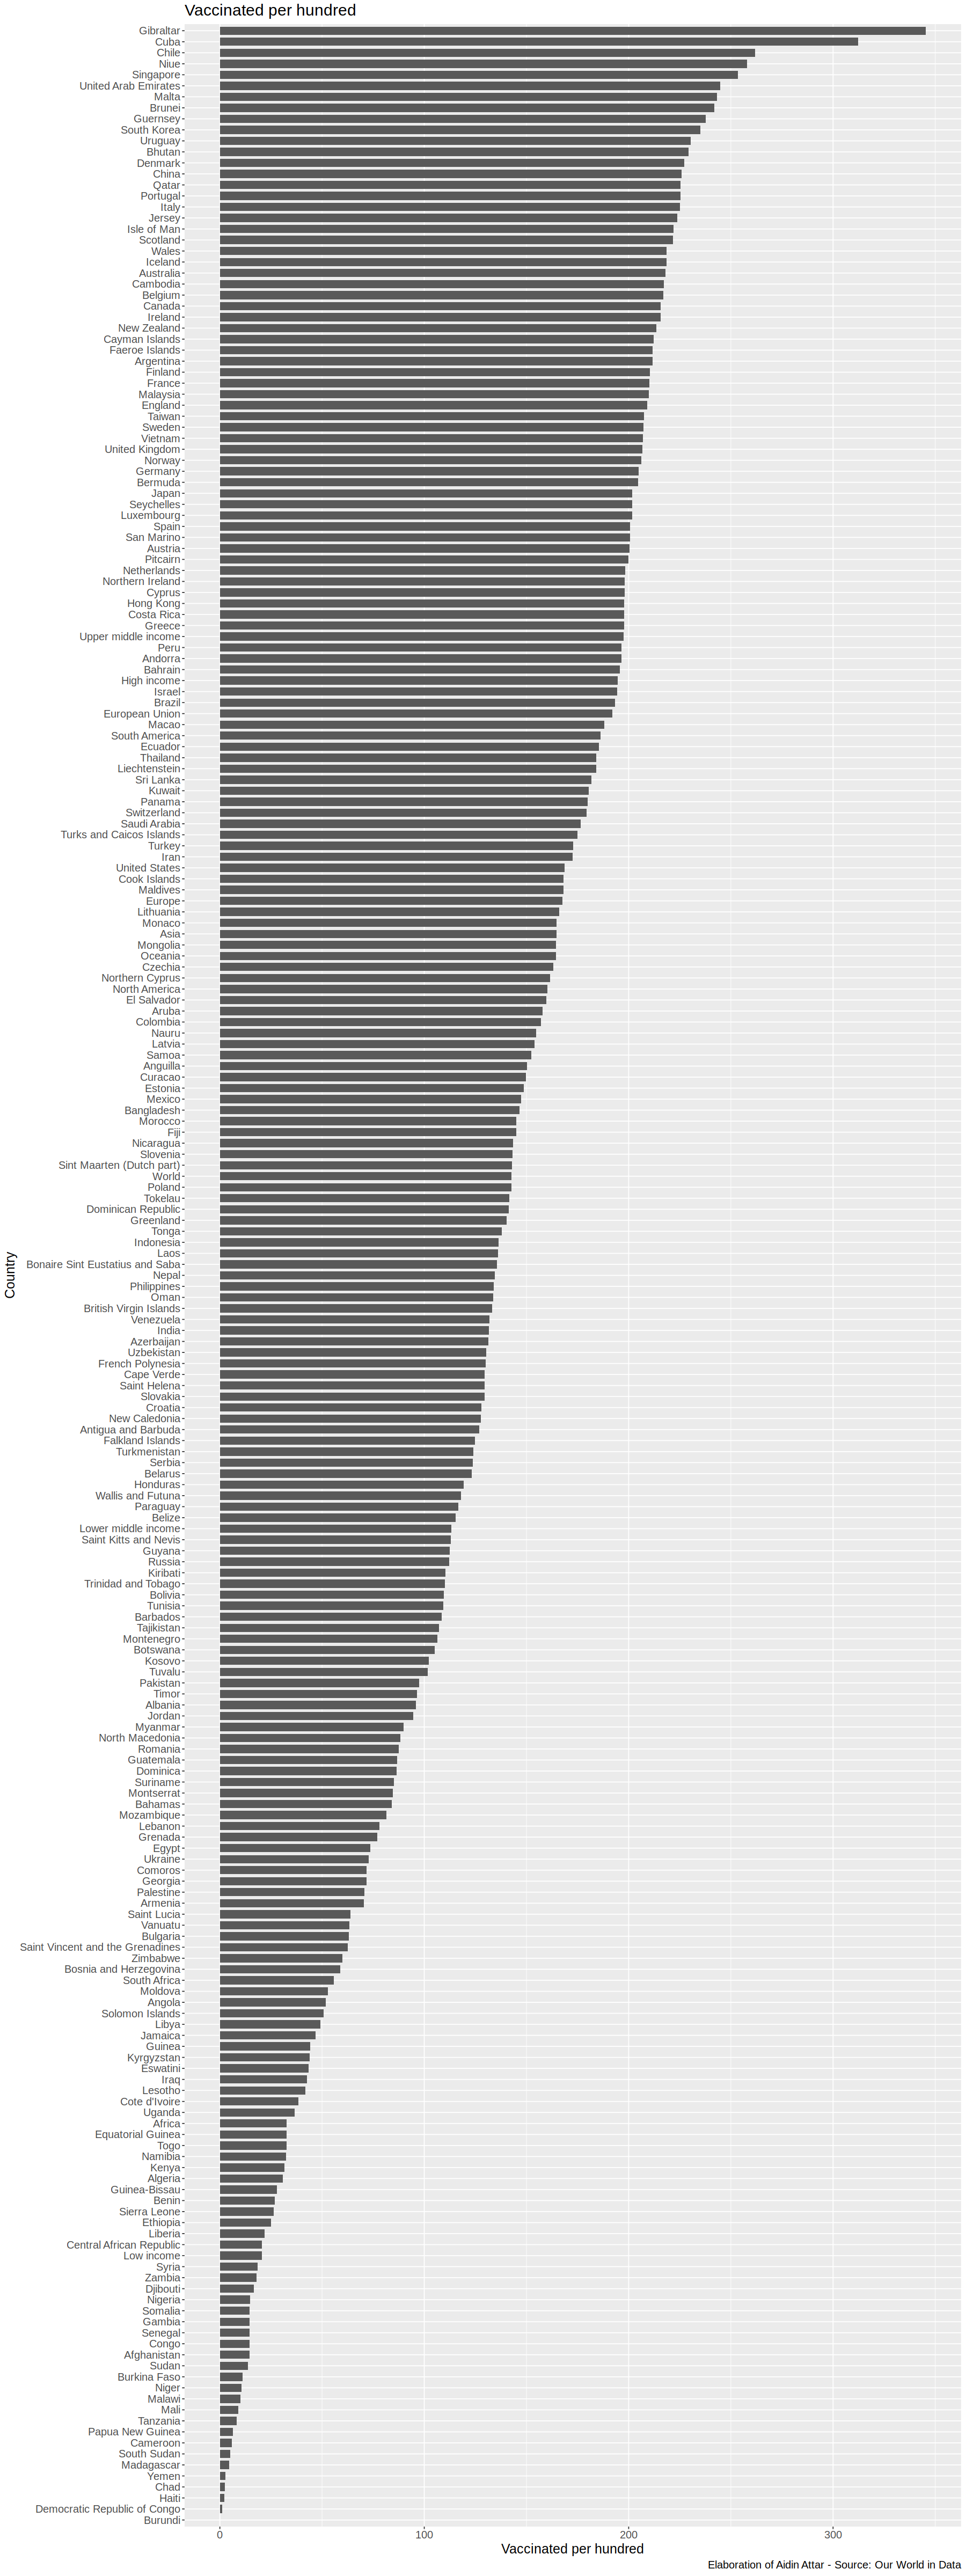

In [128]:
vac <- vaccinations %>% group_by(location) %>% summarise(across(everything(), list(last)))
vac <- vac[order(vac$people_vaccinated_per_hundred_1, decreasing = TRUE),]

options(repr.plot.width=15, repr.plot.height=40)

p1 <- ggplot(data =subset( vac, !is.na(total_vaccinations_per_hundred_1)), aes(x=reorder(location, total_vaccinations_per_hundred_1), y=total_vaccinations_per_hundred_1))
p1 <- p1 + geom_col(width = .75)
p1 <- p1 + labs(x        = "Country",
                y        = "Vaccinated per hundred",
                title    = "Vaccinated per hundred",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")
p1 <- p1 + theme(text    = element_text(size=15))
p1 <- p1 + coord_flip()
p1

Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 4 rows containing missing values (position_stack).”


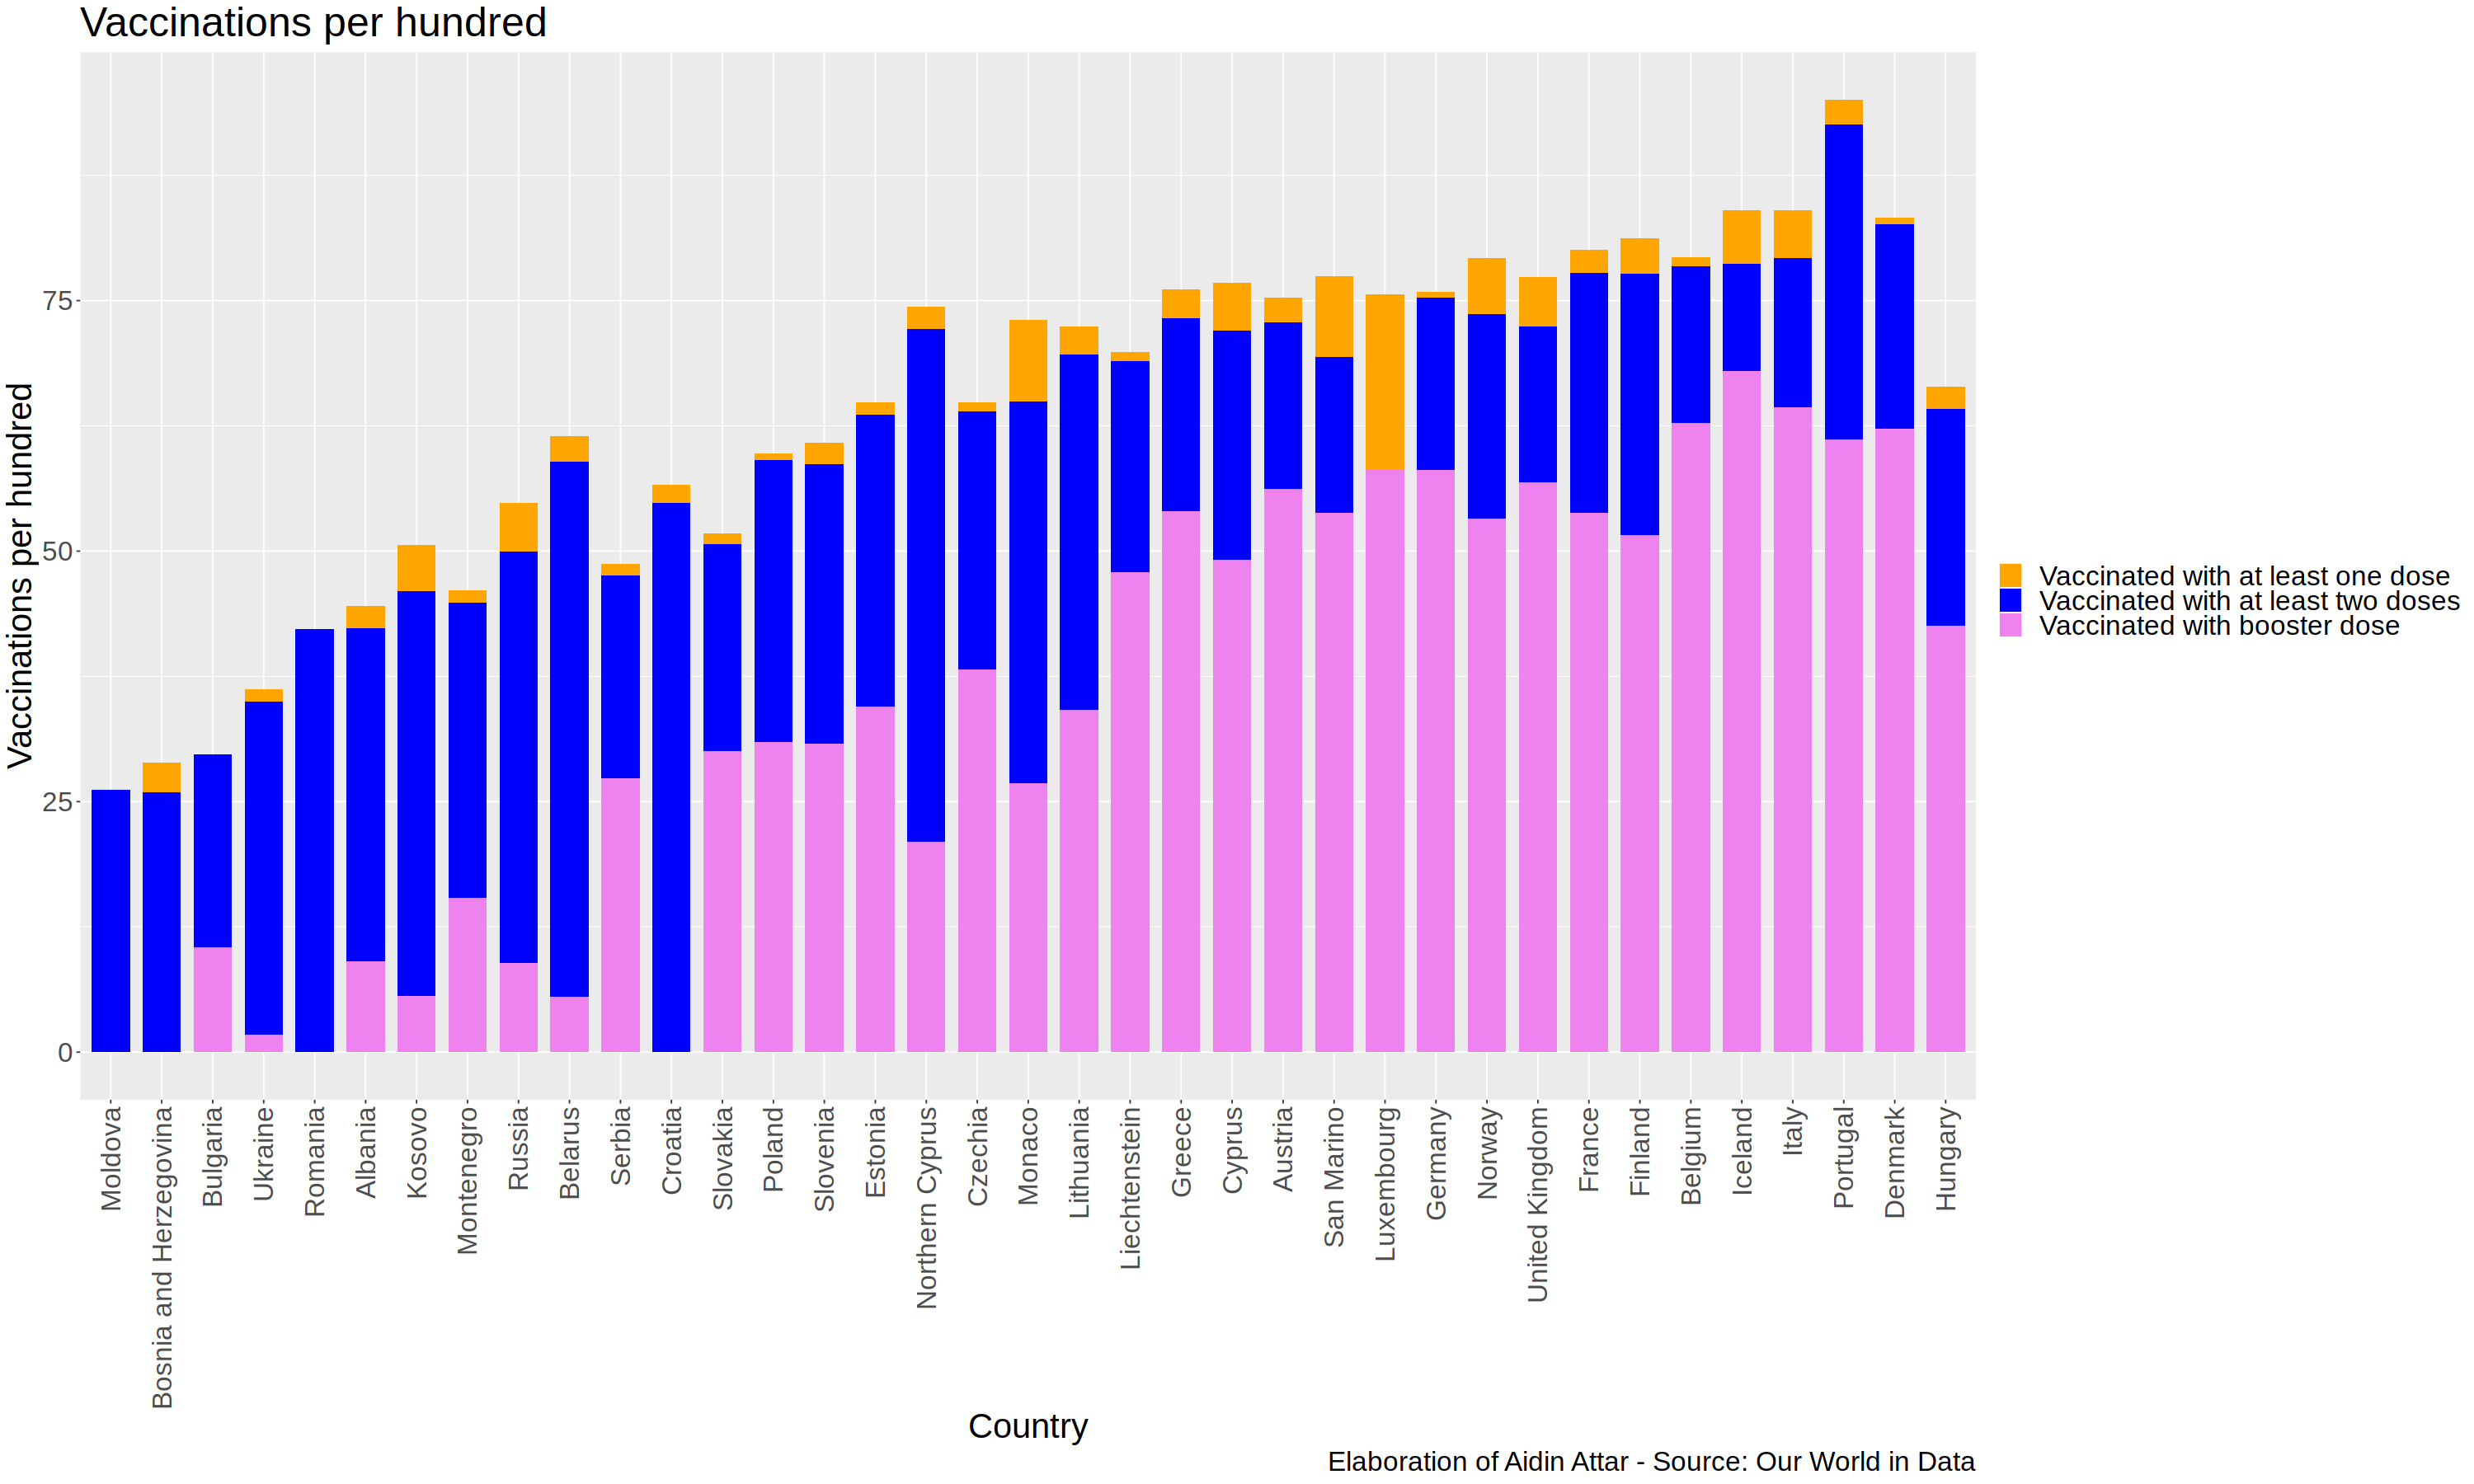

In [162]:
options(repr.plot.width=25, repr.plot.height=15)

p1 <- ggplot(data = filter(vac, location %in% european_countries), aes(x=reorder(location, total_vaccinations_per_hundred_1)))
p1 <- p1 + geom_col(aes(y=people_vaccinated_per_hundred_1, fill='Vaccinated with at least one dose'), width = .75)
p1 <- p1 + geom_col(aes(y=people_fully_vaccinated_per_hundred_1, , fill='Vaccinated with at least two doses'), width = .75)
p1 <- p1 + geom_col(aes(y=total_boosters_per_hundred_1, fill='Vaccinated with booster dose'), width = .75)
p1 <- p1 + scale_fill_manual(values = c("orange", "blue", "violet"))
p1 <- p1 + labs(x        = "Country",
                y        = "Vaccinations per hundred",
                title    = "Vaccinations per hundred",
                fill     = "",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")
p1 <- p1 + theme(text    = element_text(size=25))
p1 <- p1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

p1

 ### The unfairness of the distribution of the vaccines

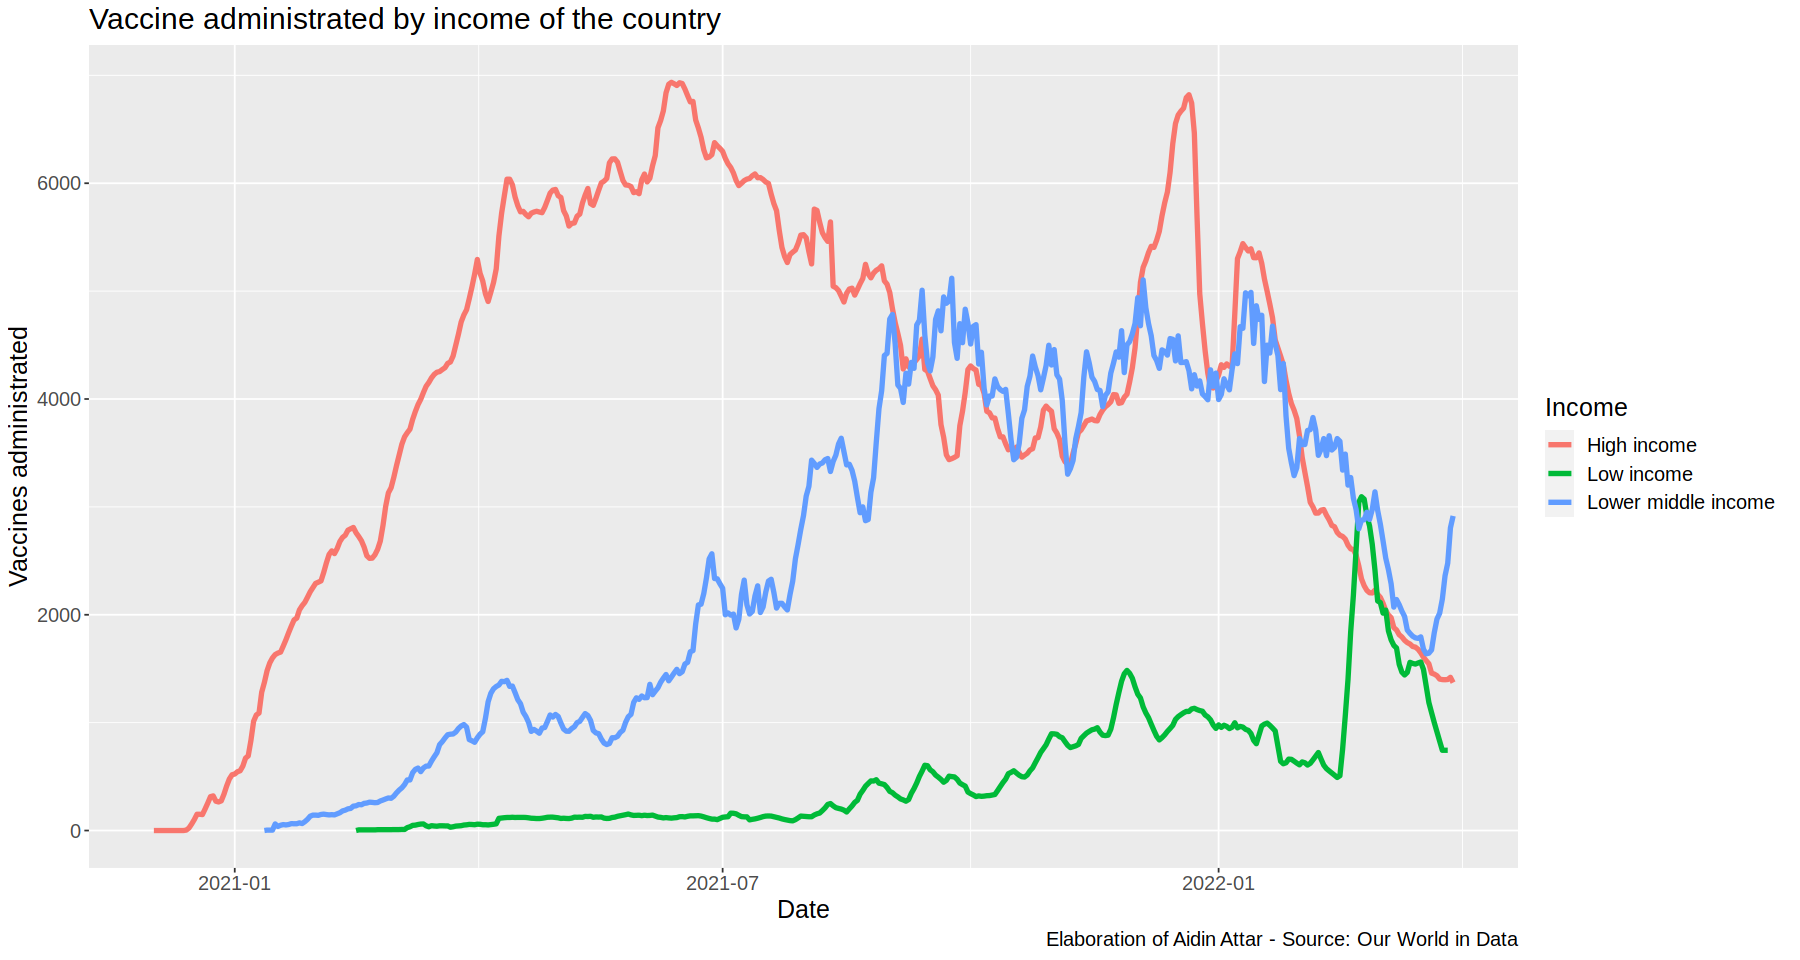

In [174]:
Income = c("Low income", "Lower middle income", "High income")

options(repr.plot.width=15, repr.plot.height=8)

p1 <- ggplot(data = filter(vaccinations, location %in% Income), aes(date, daily_vaccinations_per_million, group = location))
p1 <- p1 + geom_line(aes(col = location), size=1.5)

p1 <- p1 + labs(x        = "Date",
                y        = "Vaccines administrated",
                title    = "Vaccine administrated by income of the country",
                color    = "Income",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + theme(text    = element_text(size=15))
p1

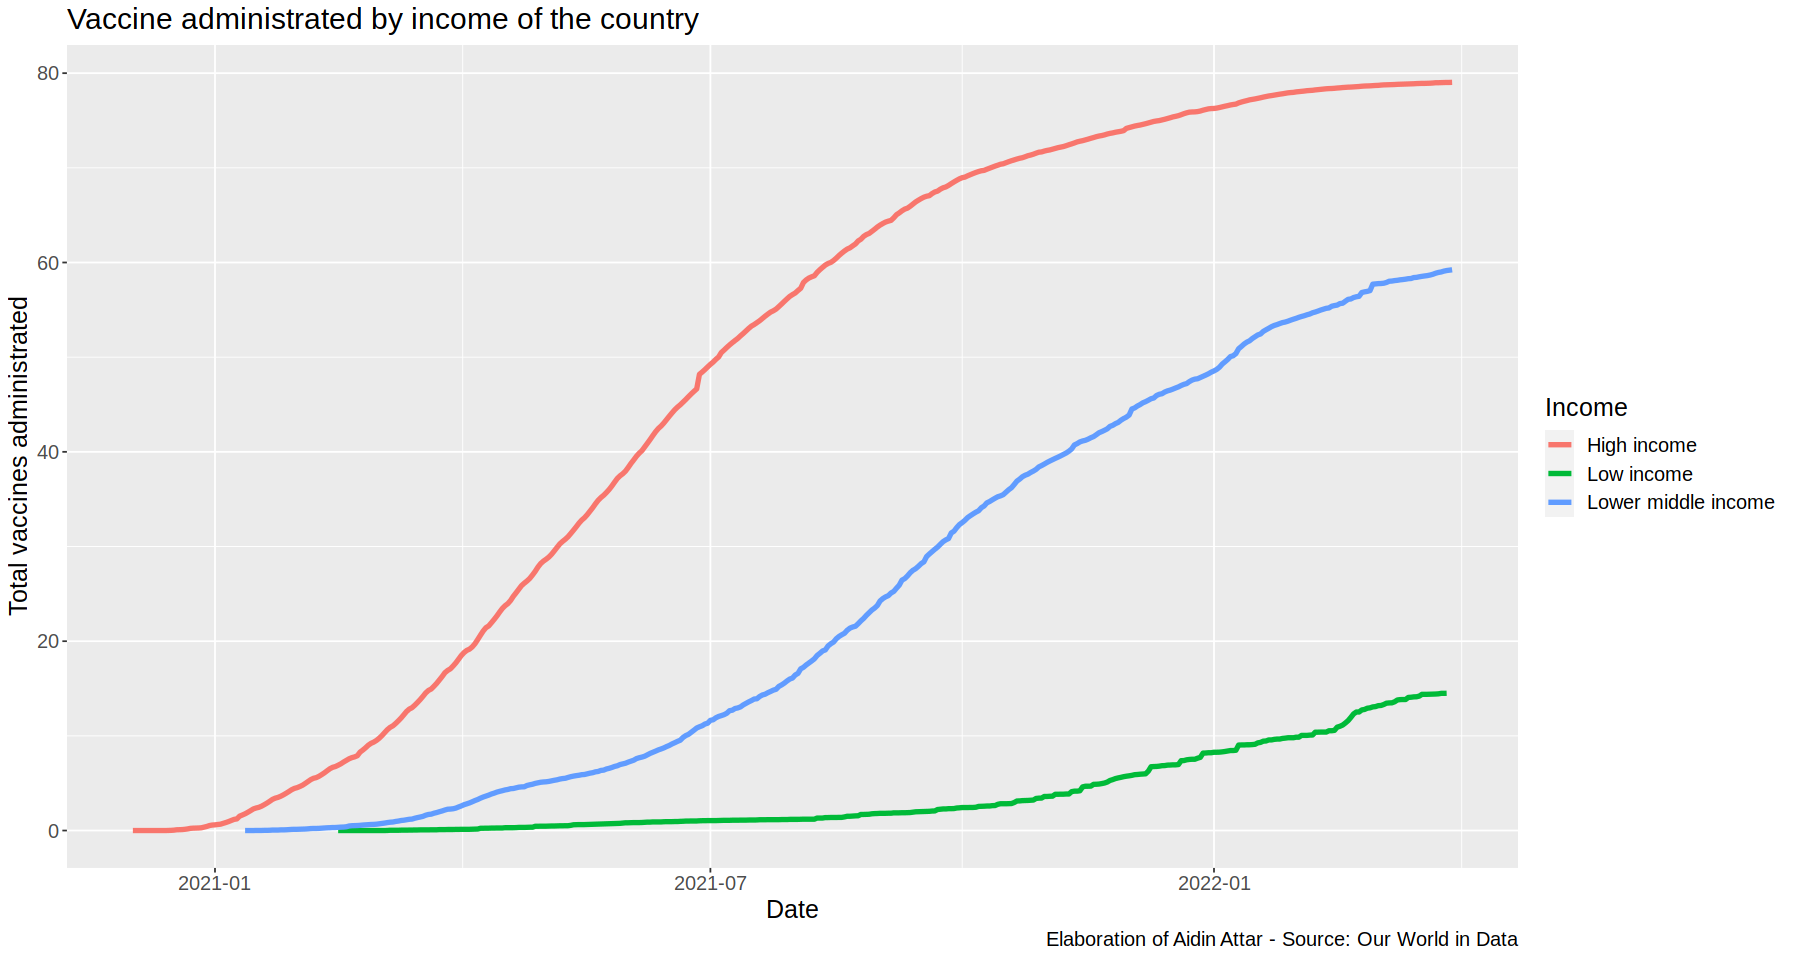

In [177]:
options(repr.plot.width=15, repr.plot.height=8)

p1 <- ggplot(data = filter(vaccinations, location %in% Income), aes(date, people_vaccinated_per_hundred, group = location))
p1 <- p1 + geom_line(aes(col = location), size=1.5)

p1 <- p1 + labs(x        = "Date",
                y        = "Total vaccines administrated",
                title    = "Vaccine administrated by income of the country",
                color    = "Income",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + theme(text    = element_text(size=15))
p1

In [183]:
fname <- "covid-vaccinations-vs-gdp-per-capita.csv"

vaccinations_GDP <- read_csv(file = paste(dir, fname, sep="/"))

param_names = c("location", "CODE", "Day", "total_vaccinations_per_hundred", "GDP_per_capita", "Year1", "Year2", "Continent")
colnames(vaccinations_GDP) <- param_names
vaccinations_GDP

New names:
* Year -> Year...6
* Year -> Year...7

Rows: 49712 Columns: 8
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Entity, Code, Continent
dbl  (4): total_vaccinations_per_hundred, GDP per capita, PPP (constant 2011...
date (1): Day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,CODE,Day,total_vaccinations_per_hundred,GDP_per_capita,Year1,Year2,Continent
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Abkhazia,OWID_ABK,2020-01-21,NA,NA,NA,2015,Asia
Afghanistan,AFG,2021-02-22,0.00,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-02-28,0.02,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-03-16,0.14,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-04-07,0.30,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-04-22,0.60,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-05-11,1.27,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-05-20,1.38,1803.987,2017,2015,Asia
Afghanistan,AFG,2021-05-24,1.44,1803.987,2017,2015,Asia


In [184]:
vac_GDP <- vaccinations_GDP %>% group_by(location) %>% summarise(across(everything(), list(last)))
vac_GDP

location,CODE_1,Day_1,total_vaccinations_per_hundred_1,GDP_per_capita_1,Year1_1,Year2_1,Continent_1
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Abkhazia,OWID_ABK,2020-01-21,NA,NA,NA,2015,Asia
Afghanistan,AFG,2022-03-22,14.44,1803.987,2017,2015,Asia
Africa,NA,2022-03-29,32.71,NA,NA,NA,NA
Akrotiri and Dhekelia,OWID_AKD,2020-01-21,NA,NA,NA,2015,Asia
Åland Islands,ALA,2020-01-21,NA,NA,NA,2015,Europe
Albania,ALB,2022-03-24,95.87,11803.431,2017,2015,Europe
Algeria,DZA,2022-03-09,30.72,13913.839,2017,2015,Africa
American Samoa,ASM,2020-01-21,NA,NA,NA,2015,Oceania
Andorra,AND,2022-03-13,196.50,NA,NA,2015,Europe


Warning message:
“Removed 144 rows containing missing values (geom_point).”


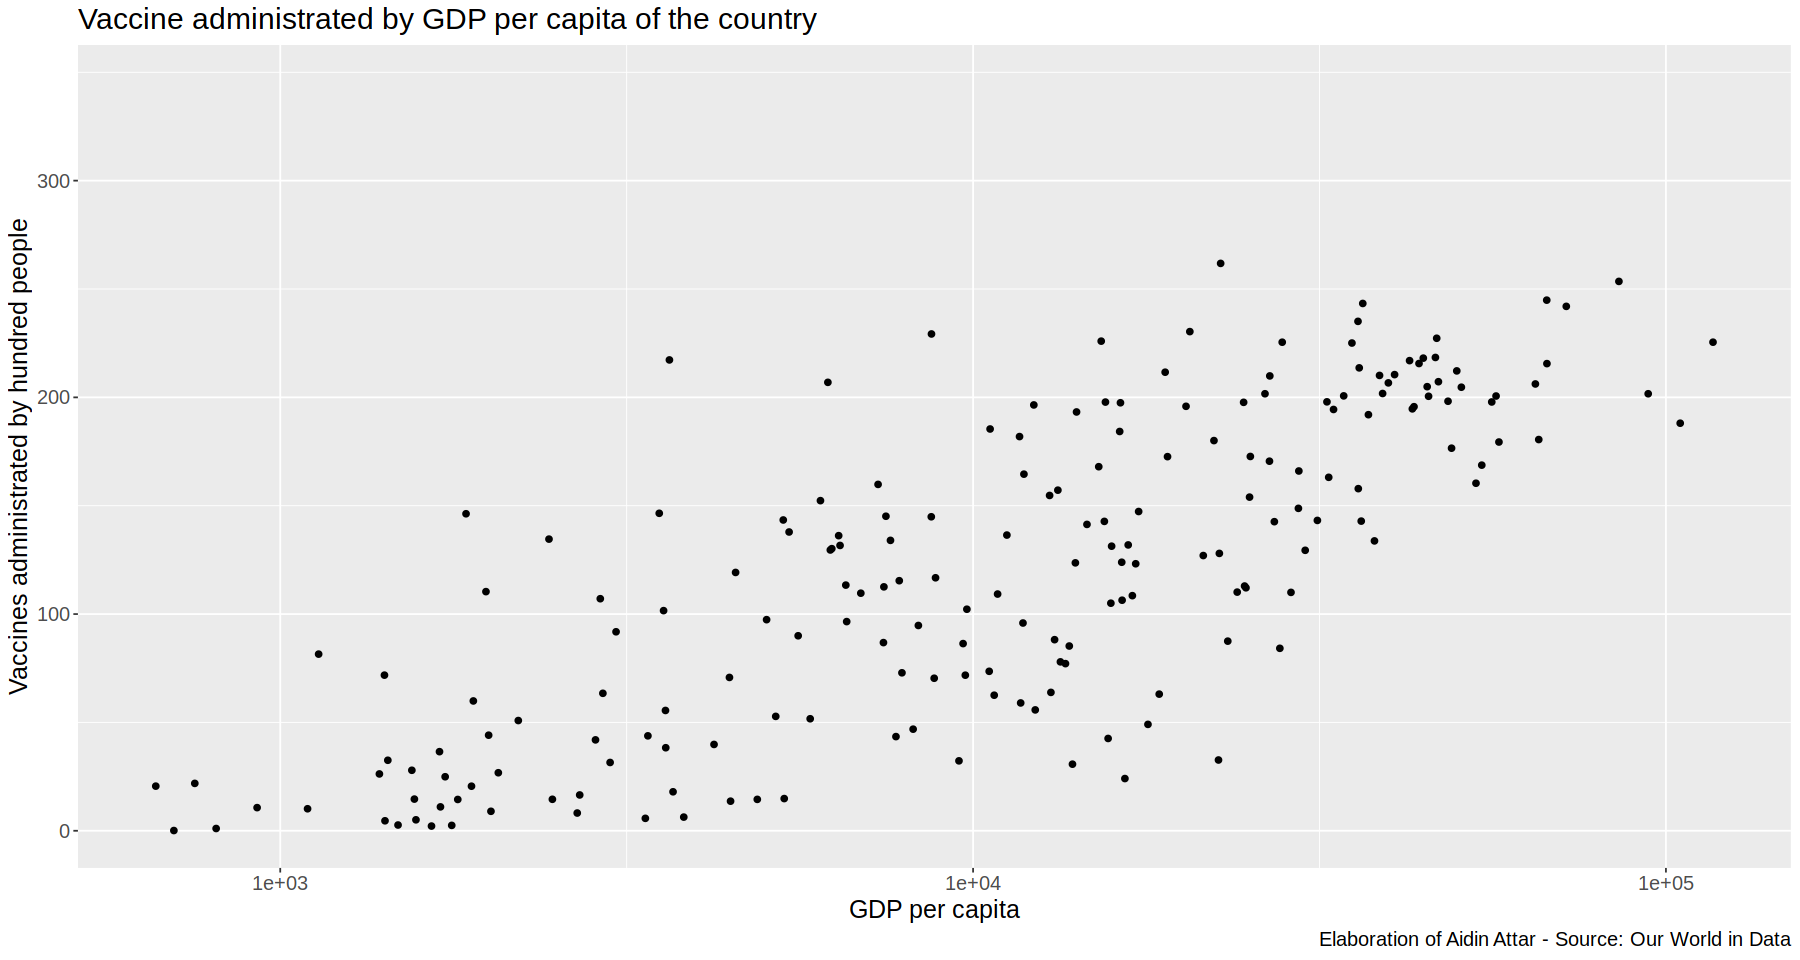

In [187]:
options(repr.plot.width=15, repr.plot.height=8)

p1 <- ggplot(data = vac_GDP)
p1 <- p1 + geom_point(aes(x=GDP_per_capita_1, y=total_vaccinations_per_hundred_1), size=1.5)

p1 <- p1 + labs(x        = "GDP per capita",
                y        = "Vaccines administrated by hundred people",
                title    = "Vaccine administrated by GDP per capita of the country",
                color    = "Income",
                caption  = "Elaboration of Aidin Attar - Source: Our World in Data")

p1 <- p1 + scale_x_continuous(trans = 'log10')
p1 <- p1 + theme(text    = element_text(size=15))
p1